# **1. Importing Libraries & Loading The Data** #

In the begining of our process, we will import the libraries needed in our project implementation, then we will load the data provided by the ID&A Team.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_excel("Dataset.xlsx")

In [ ]:
df.head(10)

SEANCE INDICE  COURS_CLOTURE  COURS_PLUS_HAUT  \
0  2023-12-08 00:00:00.000   MASI       11885.32         11885.32   
1  2023-12-07 00:00:00.000   MASI       11827.02         11827.02   
2  2023-12-06 00:00:00.000   MASI       11757.60         11792.95   
3  2023-12-05 00:00:00.000   MASI       11759.51         11785.10   
4  2023-12-04 00:00:00.000   MASI       11728.06         11769.43   
5  2023-12-01 00:00:00.000   MASI       11748.19         11818.46   
6  2023-11-30 00:00:00.000   MASI       11781.56         11825.18   
7  2023-11-29 00:00:00.000   MASI       11784.33         11828.51   
8  2023-11-28 00:00:00.000   MASI       11775.17         11857.90   
9  2023-11-27 00:00:00.000   MASI       11843.79         11958.13   

   COURS_PLUS_BAS  COURS_OUVERTURE  COURS_VEILLE  VARIATION  
0        11824.97         11827.02      11827.02       0.49  
1        11757.60         11757.60      11757.60       0.59  
2        11718.07         11759.51      11759.51      -0.02  
3        11709.49         11728.06      11728.06       0.27  
4        11702.27         11748.19      11748.19      -0.17  
5        11731.93         11781.56      11781.56      -0.28  
6        11754.07         11784.33      11784.33      -0.02  
7        11759.89         11775.17      11775.17       0.08  
8        11757.50         11843.79      11843.79      -0.58  
9        11843.67         11957.67      11957.67      -0.95

# **2. Data Cleaning and Transformation** #

In [ ]:
df['INDICE'].value_counts()

INDICE
MASI    2366
Name: count, dtype: int64

We can note that the INDICE Column contains only one value "MASI"

In [ ]:
df.shape

(2366, 8)

The Dataset contains 2366 row and 8 Columns

In [ ]:
features = df.columns
features

Index(['SEANCE', 'INDICE', 'COURS_CLOTURE', 'COURS_PLUS_HAUT',
       'COURS_PLUS_BAS', 'COURS_OUVERTURE', 'COURS_VEILLE', 'VARIATION'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEANCE           2366 non-null   object 
 1   INDICE           2366 non-null   object 
 2   COURS_CLOTURE    2366 non-null   float64
 3   COURS_PLUS_HAUT  2366 non-null   float64
 4   COURS_PLUS_BAS   2366 non-null   float64
 5   COURS_OUVERTURE  2366 non-null   float64
 6   COURS_VEILLE     2366 non-null   float64
 7   VARIATION        2366 non-null   float64
dtypes: float64(6), object(2)
memory usage: 148.0+ KB


We see that almost all the dataset's columns are of float64 type, except for SEANCE and INDICE which are of type Object, which we should handle of course.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

SEANCE             0
INDICE             0
COURS_CLOTURE      0
COURS_PLUS_HAUT    0
COURS_PLUS_BAS     0
COURS_OUVERTURE    0
COURS_VEILLE       0
VARIATION          0
dtype: int64

We have no duplicated rows nor missing values  in this dataset

In [ ]:
df['DATE'] = df['SEANCE']
df.head()

SEANCE INDICE  COURS_CLOTURE  COURS_PLUS_HAUT  \
0  2023-12-08 00:00:00.000   MASI       11885.32         11885.32   
1  2023-12-07 00:00:00.000   MASI       11827.02         11827.02   
2  2023-12-06 00:00:00.000   MASI       11757.60         11792.95   
3  2023-12-05 00:00:00.000   MASI       11759.51         11785.10   
4  2023-12-04 00:00:00.000   MASI       11728.06         11769.43   

   COURS_PLUS_BAS  COURS_OUVERTURE  COURS_VEILLE  VARIATION  \
0        11824.97         11827.02      11827.02       0.49   
1        11757.60         11757.60      11757.60       0.59   
2        11718.07         11759.51      11759.51      -0.02   
3        11709.49         11728.06      11728.06       0.27   
4        11702.27         11748.19      11748.19      -0.17   

                      DATE  
0  2023-12-08 00:00:00.000  
1  2023-12-07 00:00:00.000  
2  2023-12-06 00:00:00.000  
3  2023-12-05 00:00:00.000  
4  2023-12-04 00:00:00.000

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d %H:%M:%S.%f')
df['TIME'] = df['DATE'].dt.time.astype(str)
df.head()

SEANCE INDICE  COURS_CLOTURE  COURS_PLUS_HAUT  \
0  2023-12-08 00:00:00.000   MASI       11885.32         11885.32   
1  2023-12-07 00:00:00.000   MASI       11827.02         11827.02   
2  2023-12-06 00:00:00.000   MASI       11757.60         11792.95   
3  2023-12-05 00:00:00.000   MASI       11759.51         11785.10   
4  2023-12-04 00:00:00.000   MASI       11728.06         11769.43   

   COURS_PLUS_BAS  COURS_OUVERTURE  COURS_VEILLE  VARIATION       DATE  \
0        11824.97         11827.02      11827.02       0.49 2023-12-08   
1        11757.60         11757.60      11757.60       0.59 2023-12-07   
2        11718.07         11759.51      11759.51      -0.02 2023-12-06   
3        11709.49         11728.06      11728.06       0.27 2023-12-05   
4        11702.27         11748.19      11748.19      -0.17 2023-12-04   

       TIME  
0  00:00:00  
1  00:00:00  
2  00:00:00  
3  00:00:00  
4  00:00:00

In [ ]:
df['TIME'].value_counts()

TIME
00:00:00    2366
Name: count, dtype: int64

We can note that the Time part of the Dates provided in the SEANCE Columns are all the same and equal to 00:00:00, just like INDICE that has the same value in all its rows, so they will be useless for us, the best appraoch is to remove these columns from our dataframe.

In [ ]:
# Removing SEANCE and INDICE
cols_to_drop= ['INDICE', 'TIME']
df.drop(columns=cols_to_drop, inplace=True)

In [ ]:
df.head()

SEANCE  COURS_CLOTURE  COURS_PLUS_HAUT  COURS_PLUS_BAS  \
0  2023-12-08 00:00:00.000       11885.32         11885.32        11824.97   
1  2023-12-07 00:00:00.000       11827.02         11827.02        11757.60   
2  2023-12-06 00:00:00.000       11757.60         11792.95        11718.07   
3  2023-12-05 00:00:00.000       11759.51         11785.10        11709.49   
4  2023-12-04 00:00:00.000       11728.06         11769.43        11702.27   

   COURS_OUVERTURE  COURS_VEILLE  VARIATION       DATE  
0         11827.02      11827.02       0.49 2023-12-08  
1         11757.60      11757.60       0.59 2023-12-07  
2         11759.51      11759.51      -0.02 2023-12-06  
3         11728.06      11728.06       0.27 2023-12-05  
4         11748.19      11748.19      -0.17 2023-12-04

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SEANCE           2366 non-null   object        
 1   COURS_CLOTURE    2366 non-null   float64       
 2   COURS_PLUS_HAUT  2366 non-null   float64       
 3   COURS_PLUS_BAS   2366 non-null   float64       
 4   COURS_OUVERTURE  2366 non-null   float64       
 5   COURS_VEILLE     2366 non-null   float64       
 6   VARIATION        2366 non-null   float64       
 7   DATE             2366 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 148.0+ KB


The DATE now has a type of datetime64, so we can now convert it into many columns, so we will have a column for each of the Year, Month and Day.

In [ ]:
# Extracting Year, Month and Day
df['YEAR'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

In [ ]:
df.head()

SEANCE  COURS_CLOTURE  COURS_PLUS_HAUT  COURS_PLUS_BAS  \
0  2023-12-08 00:00:00.000       11885.32         11885.32        11824.97   
1  2023-12-07 00:00:00.000       11827.02         11827.02        11757.60   
2  2023-12-06 00:00:00.000       11757.60         11792.95        11718.07   
3  2023-12-05 00:00:00.000       11759.51         11785.10        11709.49   
4  2023-12-04 00:00:00.000       11728.06         11769.43        11702.27   

   COURS_OUVERTURE  COURS_VEILLE  VARIATION       DATE  YEAR  Month  DAY  
0         11827.02      11827.02       0.49 2023-12-08  2023     12    8  
1         11757.60      11757.60       0.59 2023-12-07  2023     12    7  
2         11759.51      11759.51      -0.02 2023-12-06  2023     12    6  
3         11728.06      11728.06       0.27 2023-12-05  2023     12    5  
4         11748.19      11748.19      -0.17 2023-12-04  2023     12    4

In [ ]:
df.isnull().sum()

SEANCE             0
COURS_CLOTURE      0
COURS_PLUS_HAUT    0
COURS_PLUS_BAS     0
COURS_OUVERTURE    0
COURS_VEILLE       0
VARIATION          0
DATE               0
YEAR               0
Month              0
DAY                0
dtype: int64

# **3. Exploratory Data Analysis** #

## *3.1. Univarie Analysis* ##

YEAR
Skew : 0.09


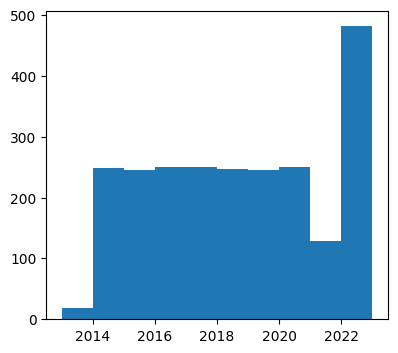

Month
Skew : 0.06


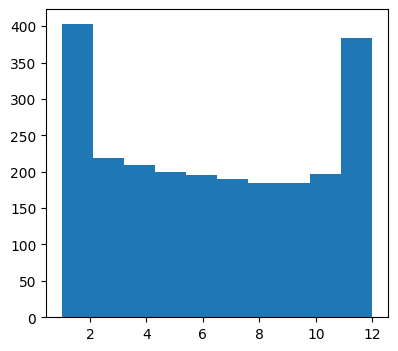

DAY
Skew : 0.01


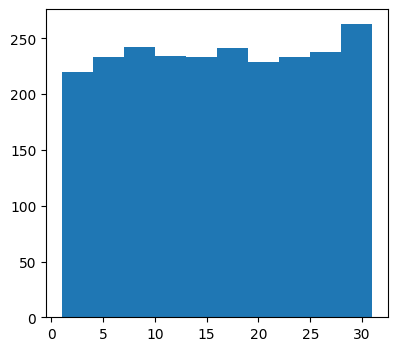

In [ ]:
#plot the histogram to see the distribution of the point data of the sub columns of date
cols=['YEAR', 'Month', 'DAY']
i=1
for col in cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 3, i)
    df[col].hist(grid=False)
    i=i+1
    plt.show()

For the first visualm wich presents the distribution of the YEAR Column, we can note that before 2014, there were few number of actions taken, and from 2014 untill before 2021, the distribution was stable, and have seen a really remarkable fall down in the year 2021, which were the year that COVID19 appereared in, maybe it was the main reason for this decrease.

For the MONTH column, we can note that the biggest part belongs to the end and the beginning of each year, here we mean in Decembre and Jenuary.

In DAY Column, the distributions varies from a day to another day in a limited range, except for the end of the Month where we can see a respectable increase.

In [ ]:
df.columns

Index(['SEANCE', 'COURS_CLOTURE', 'COURS_PLUS_HAUT', 'COURS_PLUS_BAS',
       'COURS_OUVERTURE', 'COURS_VEILLE', 'VARIATION', 'DATE', 'YEAR', 'Month',
       'DAY'],
      dtype='object')

COURS_CLOTURE
Skew: 0.06


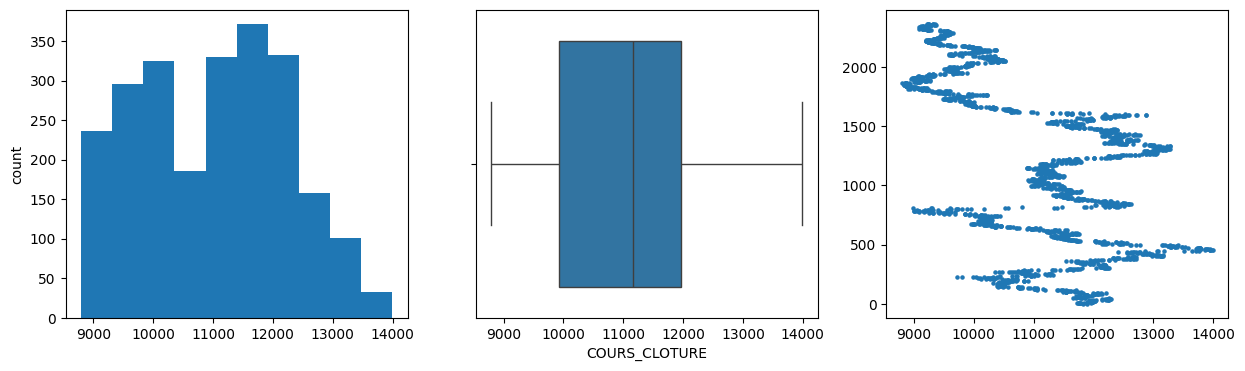

COURS_PLUS_HAUT
Skew: 0.05


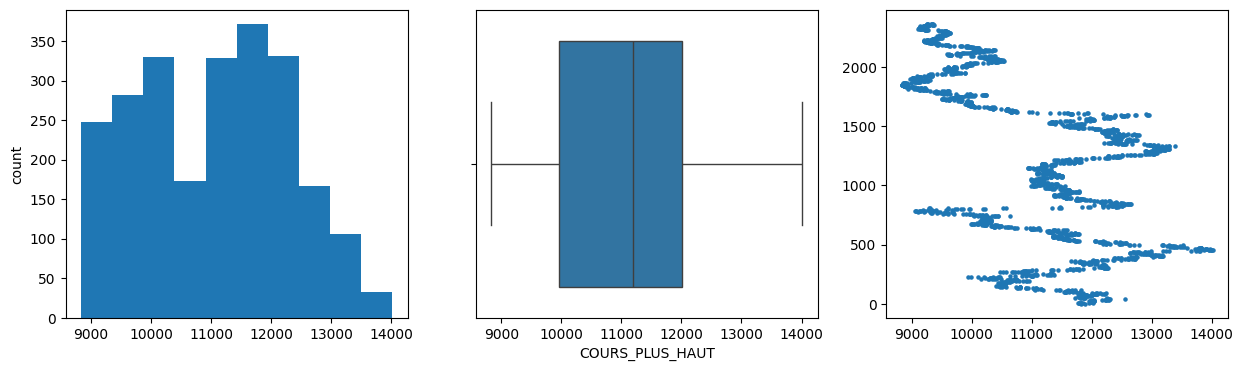

COURS_PLUS_BAS
Skew: 0.07


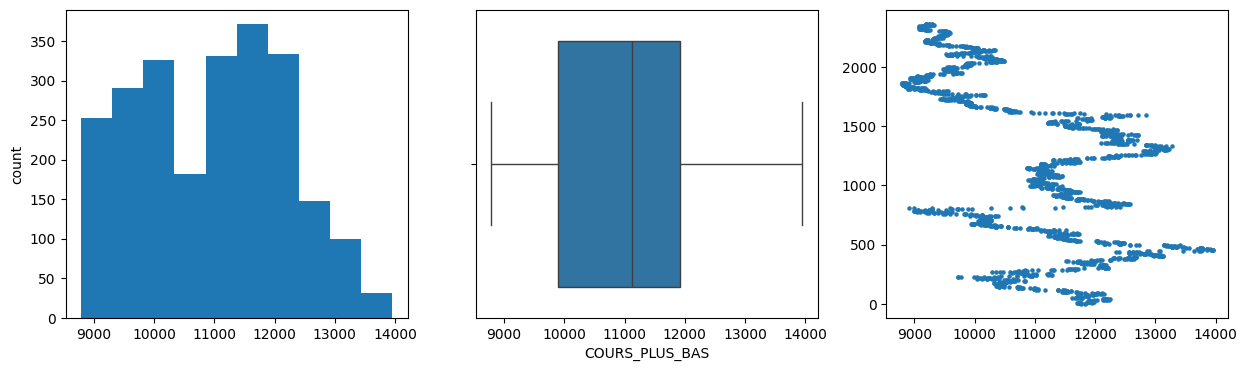

COURS_OUVERTURE
Skew: 0.06


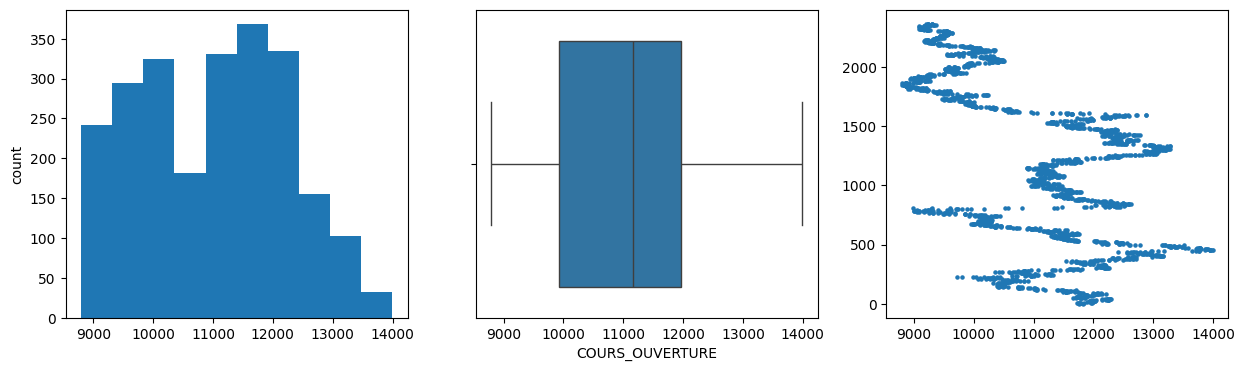

COURS_VEILLE
Skew: 0.06


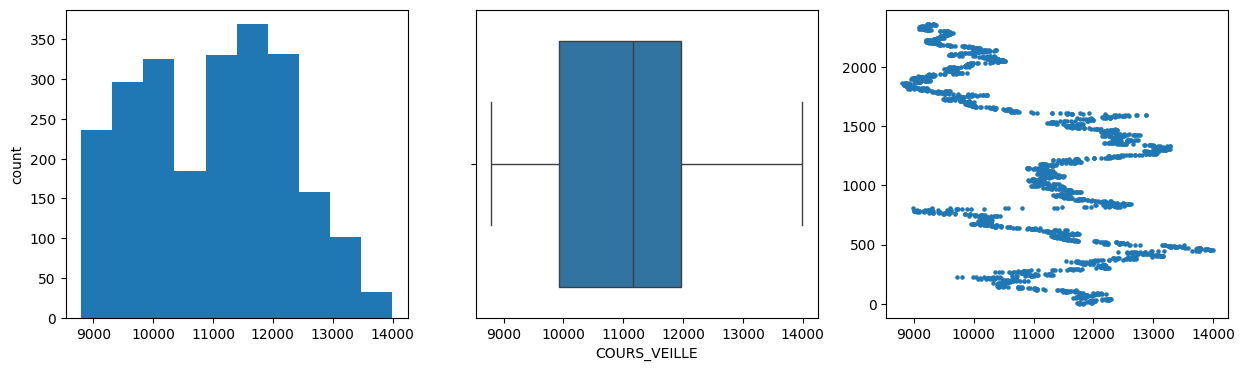

VARIATION
Skew: 0.01


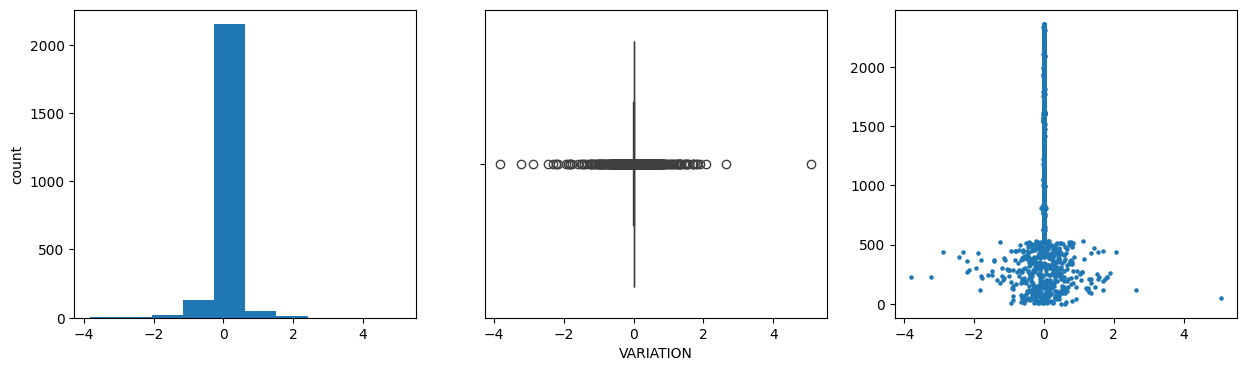

In [ ]:
# Checking for outliers in our columns

num_cols = ['COURS_CLOTURE', 'COURS_PLUS_HAUT', 'COURS_PLUS_BAS', 'COURS_OUVERTURE', 'COURS_VEILLE', 'VARIATION']

for col in num_cols:
    print(col)
    print('Skew:', round(df[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col], showfliers=True)
    plt.subplot(1, 3, 3)
    plt.scatter(x=df[col], y=df.index, s=5)
    plt.show()

We can see that all our numerical columns varies in almost same range and there is no big difference between them, ecept for the VARIATION column which shows a clear changing and different distribution, but first, let;s take a closer look at the scatter plot of one these numerical columns.

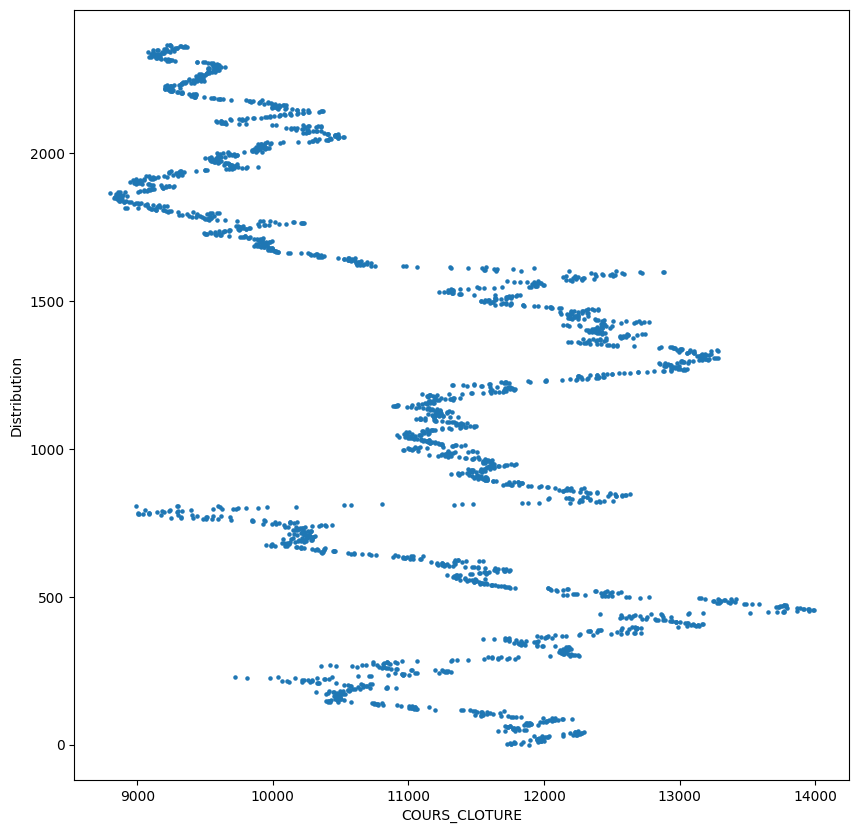

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['COURS_CLOTURE'], y=df.index, s=5)
plt.xlabel('COURS_CLOTURE', fontsize=10)
plt.ylabel('Distribution', fontsize=10)
plt.show()

VARIATION
Skew : 0.01


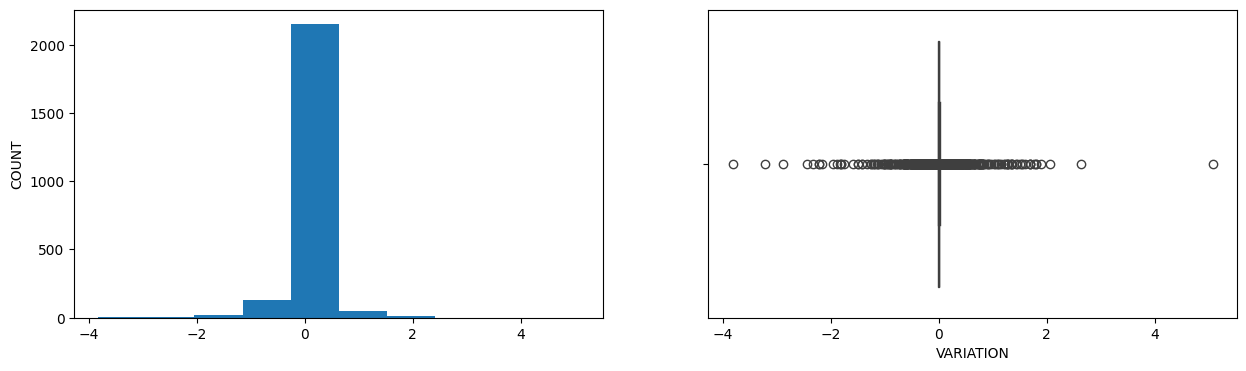

In [ ]:
print(col)
print('Skew :', round(df[col].skew(), 2))
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
df['VARIATION'].hist(grid=False)
plt.ylabel('COUNT')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['VARIATION'])
plt.show()

We can note from this visuaizations that the variation column has a great number of cells that varies near zero, and has some outliers too, thanks to the scatter plot we can see them, we will handle the outliers later. It is hsown more cllear in the visualization above.

In [ ]:
# Set index to SEANCE
df.set_index('DATE', inplace=True)


In [ ]:
df

SEANCE  COURS_CLOTURE  COURS_PLUS_HAUT  \
DATE                                                                  
2023-12-08  2023-12-08 00:00:00.000       11885.32         11885.32   
2023-12-07  2023-12-07 00:00:00.000       11827.02         11827.02   
2023-12-06  2023-12-06 00:00:00.000       11757.60         11792.95   
2023-12-05  2023-12-05 00:00:00.000       11759.51         11785.10   
2023-12-04  2023-12-04 00:00:00.000       11728.06         11769.43   
...                             ...            ...              ...   
2013-12-12  2013-12-12 00:00:00.000        9320.66          9320.66   
2013-12-11  2013-12-11 00:00:00.000        9252.30          9252.30   
2013-12-10  2013-12-10 00:00:00.000        9241.40          9263.15   
2013-12-09  2013-12-09 00:00:00.000        9221.40          9277.00   
2013-12-06  2013-12-06 00:00:00.000        9240.41          9340.03   

            COURS_PLUS_BAS  COURS_OUVERTURE  COURS_VEILLE  VARIATION  YEAR  \
DATE                                                                         
2023-12-08        11824.97         11827.02      11827.02   0.490000  2023   
2023-12-07        11757.60         11757.60      11757.60   0.590000  2023   
2023-12-06        11718.07         11759.51      11759.51  -0.020000  2023   
2023-12-05        11709.49         11728.06      11728.06   0.270000  2023   
2023-12-04        11702.27         11748.19      11748.19  -0.170000  2023   
...                    ...              ...           ...        ...   ...   
2013-12-12         9241.91          9241.91       9252.30   0.007388  2013   
2013-12-11         9194.57          9239.97       9241.40   0.001179  2013   
2013-12-10         9196.77          9203.46       9221.40   0.002169  2013   
2013-12-09         9199.47          9235.06       9240.41  -0.002057  2013   
2013-12-06         9240.39          9310.02       9327.31  -0.009317  2013   

            Month  DAY  
DATE                    
2023-12-08     12    8  
2023-12-07     12    7  
2023-12-06     12    6  
2023-12-05     12    5  
2023-12-04     12    4  
...           ...  ...  
2013-12-12     12   12  
2013-12-11     12   11  
2013-12-10     12   10  
2013-12-09     12    9  
2013-12-06     12    6  

[2366 rows x 10 columns]

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'data' is a pandas DataFrame with your data
# Make sure the 'SEANCE' column is set as the index

# Create a Plotly figure
fig = go.Figure()

# Add traces for positive and negative variations
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['VARIATION'][df['VARIATION'] >= 0],
    mode='lines',
    name='Positive Variation',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['VARIATION'][df['VARIATION'] < 0],
    mode='lines',
    name='Negative Variation',
    line=dict(color='red')
))

# Customize the layout with design elements
fig.update_layout(
    title='Stock Price Variations Over Time',
    xaxis_title='Date',
    yaxis_title='Variation',
    template='plotly_dark',
    showlegend=True,
    autosize=False,
    width=1000,
    height=500,
)

# Show the plot
fig.show()


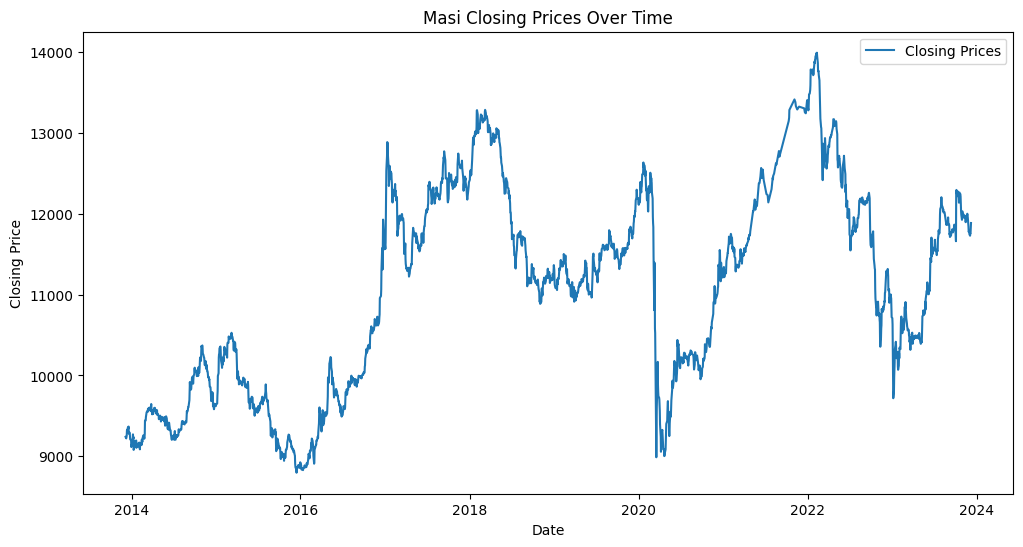

In [ ]:
from matplotlib import pyplot as plt
# Time series plot of closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['COURS_CLOTURE'], label='Closing Prices')
plt.title('Masi Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

Here we can see that the price of cloture was not chanbging in a stable or clear way over the years

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'data' is a pandas DataFrame with your data
# Make sure the 'SEANCE' column is set as the index

# Create a Plotly figure
fig = go.Figure()

# Add traces for each column
fig.add_trace(go.Scatter(x=df.index, y=df['COURS_CLOTURE'], mode='lines', name='Closing Price'))
fig.add_trace(go.Scatter(x=df.index, y=df['COURS_PLUS_HAUT'], mode='lines', name='High Price'))
fig.add_trace(go.Scatter(x=df.index, y=df['COURS_PLUS_BAS'], mode='lines', name='Low Price'))
fig.add_trace(go.Scatter(x=df.index, y=df['COURS_OUVERTURE'], mode='lines', name='Opening Price'))
fig.add_trace(go.Scatter(x=df.index, y=df['COURS_VEILLE'], mode='lines', name='Previous Close'))
fig.add_trace(go.Scatter(x=df.index, y=df['VARIATION'], mode='lines', name='Variation'))

# Customize the layout with design elements
fig.update_layout(
    title='Stock Prices Over Time',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    template='plotly_dark',
    showlegend=True,
    autosize=False,
    width=1000,
    height=500,
)

# Show the plot
fig.show()


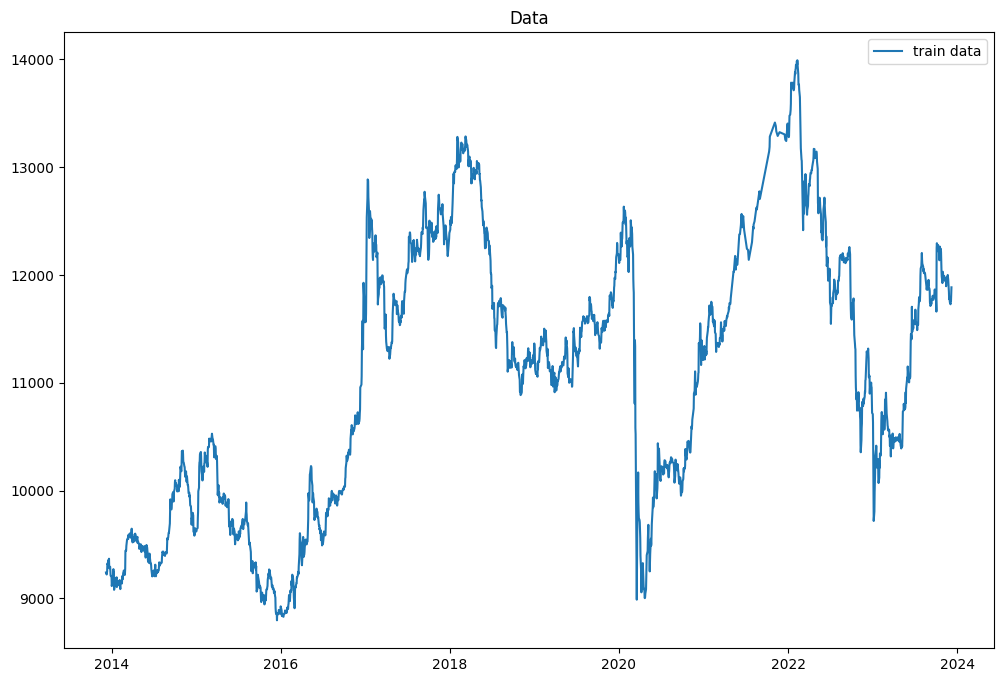

In [ ]:
df.shape

plt.figure(figsize=(12,8))

plt.plot(df.index, df['COURS_CLOTURE'], label='train data')

plt.legend(loc='best')
plt.title("Data")
plt.show()

## *3.2. Bivarie Analysis* ##

In [ ]:
import plotly.graph_objects as go

baseline = df['COURS_CLOTURE'].min()
max_value = df['COURS_CLOTURE'].max()

# Create a Plotly figure
fig = go.Figure()

# Add trace for the COURS_CLOTURE column with baseline set to 0
fig.add_trace(go.Scatter(x=df.index, y=df['COURS_CLOTURE'] - baseline, mode='lines', name='COURS_CLOTURE'))



# Customize the layout with design elements
fig.update_layout(
    title="""Historique des Prix des Actions de l'Indice MASI""",
    xaxis_title='Date',
    yaxis_title='Prix des Actions (MAD)',
    template="plotly_white",
    showlegend=True,
    autosize=False,
    width=1000,
    height=500,
)

fig.show()


We can note that the price of cloture has a really remarkable go down during the beginning of the year of 2020, and that maybe because of the pandamic that has been really difficult to all the sectors around the world.

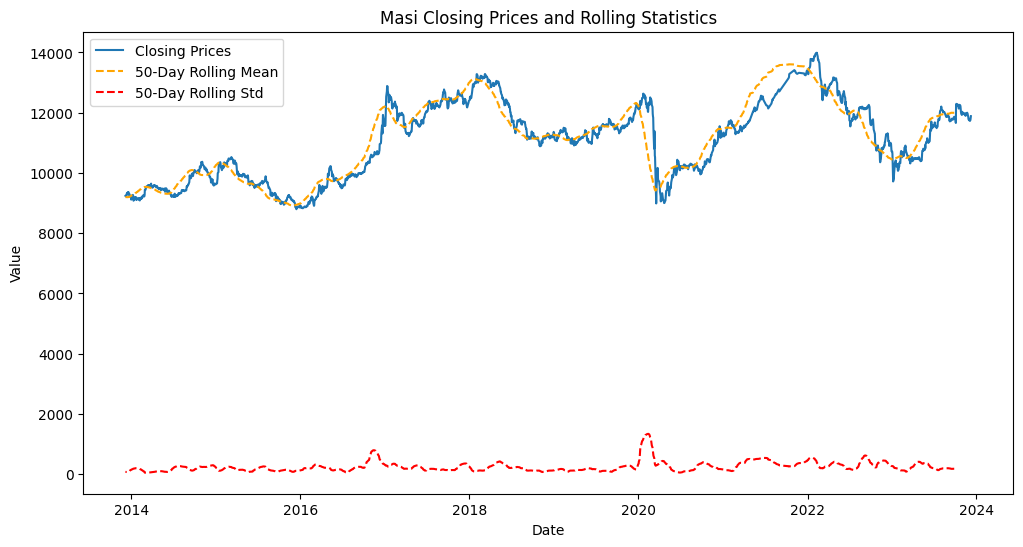

In [ ]:
# Calculate rolling mean and standard deviation
window = 50  # Adjust the window size as needed
df['Rolling_Mean'] = df['COURS_CLOTURE'].rolling(window=window).mean()
df['Rolling_Std'] = df['COURS_CLOTURE'].rolling(window=window).std()

# Plot rolling mean and standard deviation
plt.figure(figsize=(12, 6))
plt.plot(df['COURS_CLOTURE'], label='Closing Prices')
plt.plot(df['Rolling_Mean'], label=f'{window}-Day Rolling Mean', linestyle='--', color='orange')
plt.plot(df['Rolling_Std'], label=f'{window}-Day Rolling Std', linestyle='--', color='red')
plt.title('Masi Closing Prices and Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()



we can note that the closing price was going up slow in the first dates in our data, then went down for a whilw and has a long increase and some changes untill the year of 2020, where the features have seen a remarkable go down due to COVID19.

Now let's see the diferent values of VARIATION in different Months

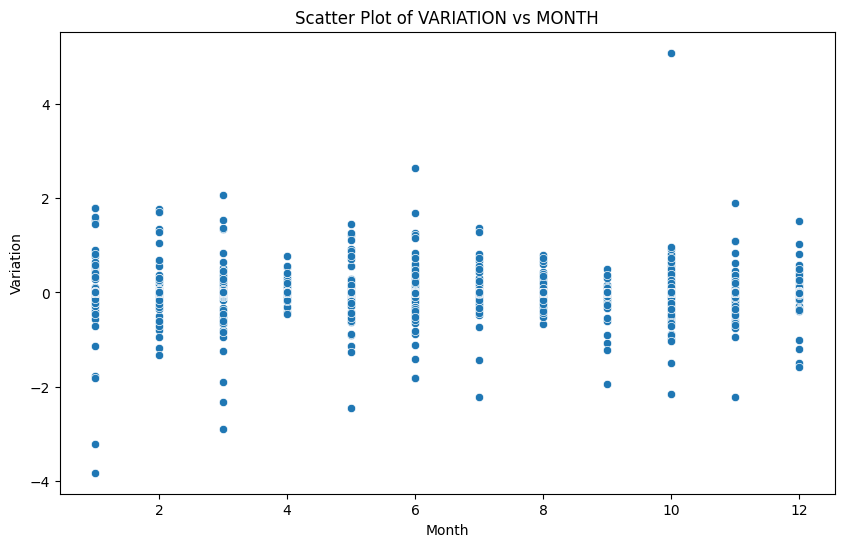

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Month', y='VARIATION', data=df, alpha=1)
plt.title('Scatter Plot of VARIATION vs MONTH')
plt.xlabel('Month')
plt.ylabel('Variation')
plt.show()

We can note that the variation varies the most of the time between 2 and -2, with the possibility of having some outliers as you can see here in the scatter plot presented.

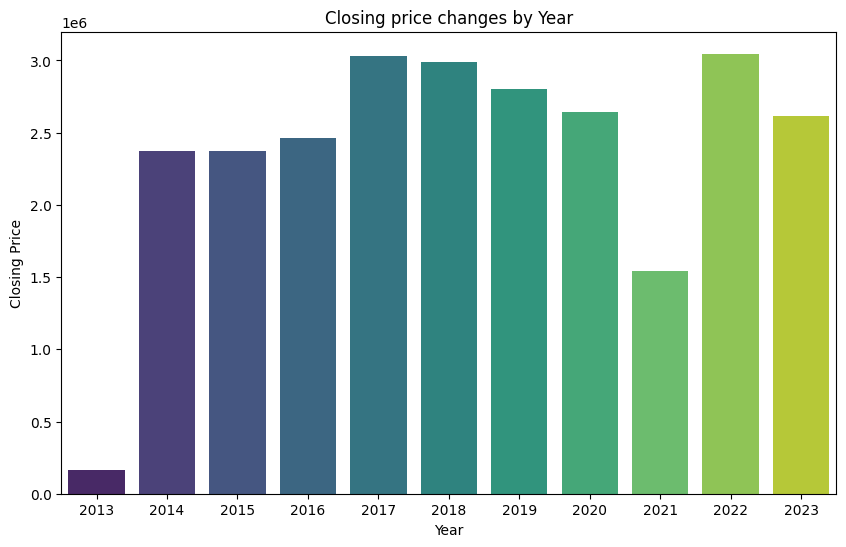

In [ ]:
year_totals = df.groupby('YEAR')['COURS_CLOTURE'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='YEAR', y='COURS_CLOTURE', data=year_totals, palette='viridis')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing price changes by Year')

# Show the plot
plt.show()

As you can see, the closing prices between 2013 and 2016 were increasing with GREAT amounts then after that directly, it went up and stayed like that in the next year too,and WENT DOWN IN 2020 in due to the reason already mentionned.

Let's see if the closing price varies over Day

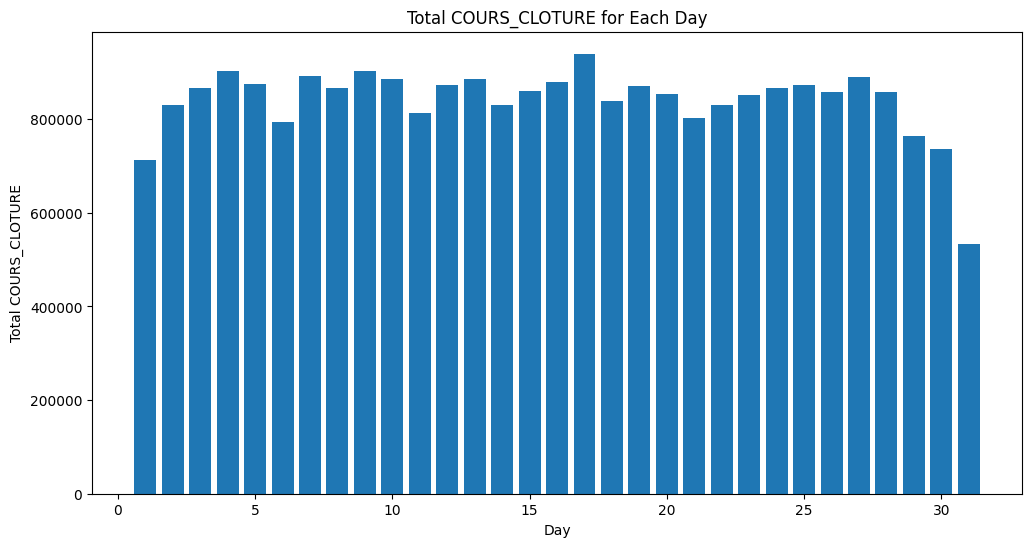

In [ ]:
day_totals = df.groupby('DAY')['COURS_CLOTURE'].sum().reset_index()

# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(day_totals['DAY'], day_totals['COURS_CLOTURE'])
plt.title('Total COURS_CLOTURE for Each Day')
plt.xlabel('Day')
plt.ylabel('Total COURS_CLOTURE')
plt.show()

We can see that DAY doesnt affect the closing price that much but that doesn't mean it is useless, absolutely not.

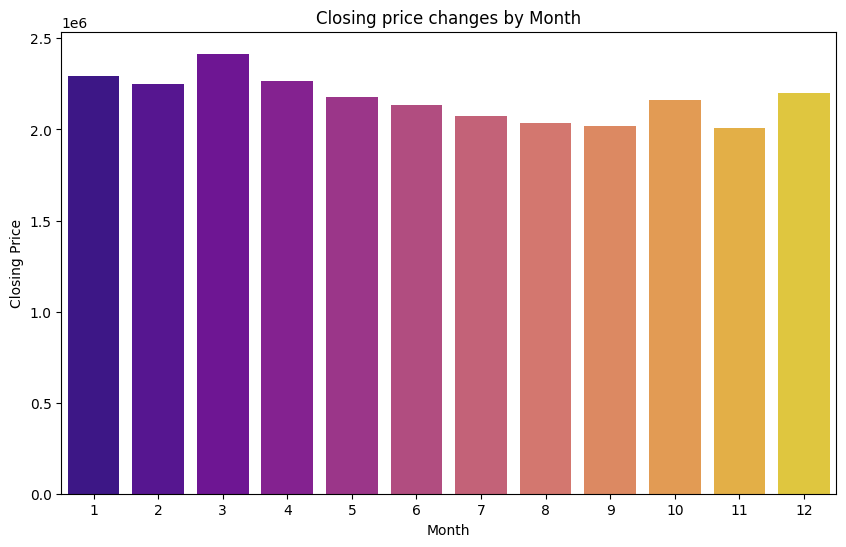

In [ ]:
Month_totals = df.groupby('Month')['COURS_CLOTURE'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='COURS_CLOTURE', data=Month_totals, palette='plasma')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.title('Closing price changes by Month')

# Show the plot
plt.show()

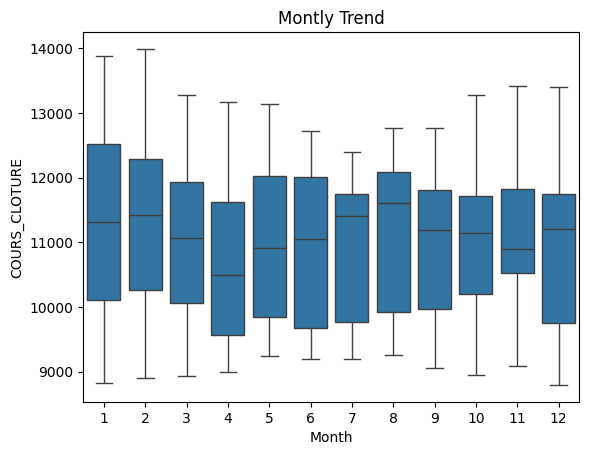

In [ ]:
sns.boxplot(x=df['Month'], y=df['COURS_CLOTURE'], )
plt.title('Montly Trend')
plt.show()

The first and the last months have observed a bigger number value of Closing price..

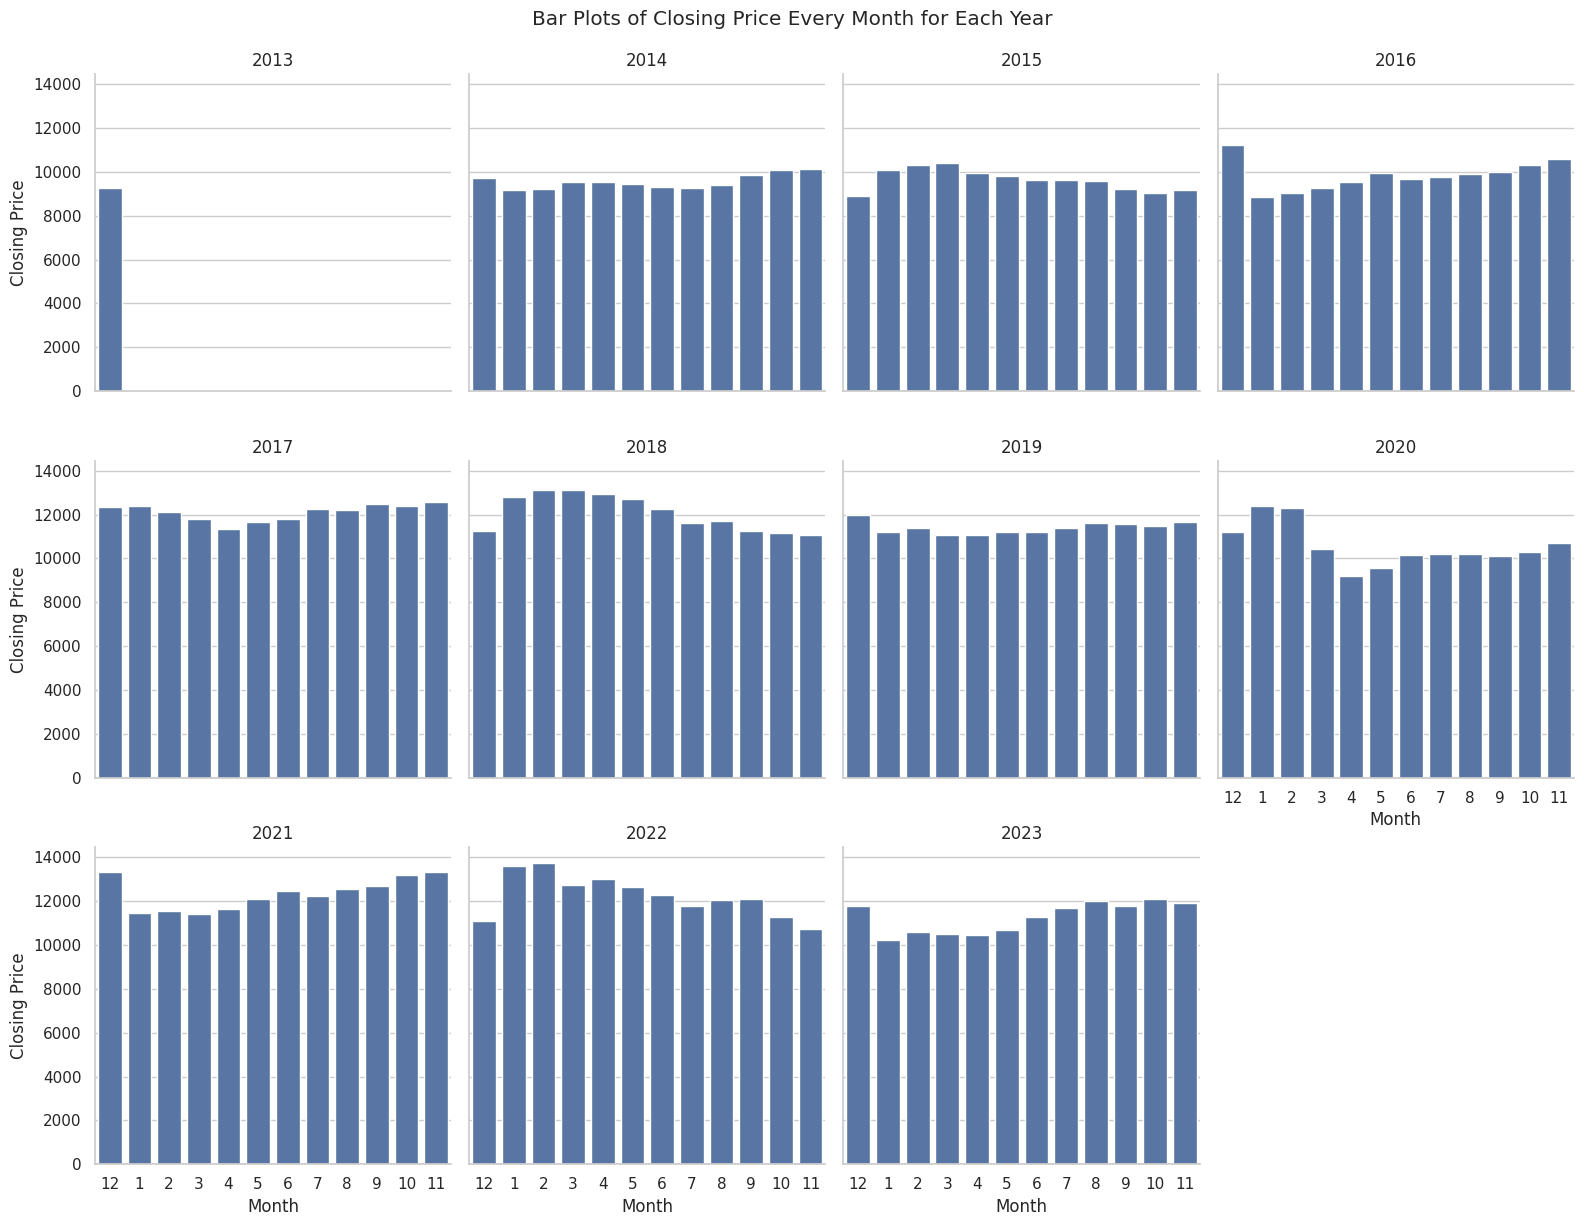

In [ ]:
sns.set(style="whitegrid")

# Create a FacetGrid for each month
g = sns.FacetGrid(df, col="YEAR", col_wrap=4, height=4, margin_titles=True)

# Create bar plots within each subplot
g.map(sns.barplot, "Month", "COURS_CLOTURE", ci=None)

# Add labels and title
g.set_axis_labels("Month", "Closing Price")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Bar Plots of Closing Price Every Month for Each Year', y=1.02)

# Show the plot
plt.show()

All the changes of Closing prices in each month of each year, we see normal patterns in the visualizations, ups and downs, but the one that got my attention the most is the going down in 2020 again.

## *3.3. Multivariate Analysis* ##

We want to calculate the correlation metrics of the features, but fisrt we have to remove the columns that are not continuous, by creating a new df.

In [ ]:
df.head()

SEANCE  COURS_CLOTURE  COURS_PLUS_HAUT  \
DATE                                                                  
2023-12-08  2023-12-08 00:00:00.000       11885.32         11885.32   
2023-12-07  2023-12-07 00:00:00.000       11827.02         11827.02   
2023-12-06  2023-12-06 00:00:00.000       11757.60         11792.95   
2023-12-05  2023-12-05 00:00:00.000       11759.51         11785.10   
2023-12-04  2023-12-04 00:00:00.000       11728.06         11769.43   

            COURS_PLUS_BAS  COURS_OUVERTURE  COURS_VEILLE  VARIATION  YEAR  \
DATE                                                                         
2023-12-08        11824.97         11827.02      11827.02       0.49  2023   
2023-12-07        11757.60         11757.60      11757.60       0.59  2023   
2023-12-06        11718.07         11759.51      11759.51      -0.02  2023   
2023-12-05        11709.49         11728.06      11728.06       0.27  2023   
2023-12-04        11702.27         11748.19      11748.19      -0.17  2023   

            Month  DAY  Rolling_Mean  Rolling_Std  
DATE                                               
2023-12-08     12    8           NaN          NaN  
2023-12-07     12    7           NaN          NaN  
2023-12-06     12    6           NaN          NaN  
2023-12-05     12    5           NaN          NaN  
2023-12-04     12    4           NaN          NaN

In [ ]:
# Numerical Columns
num_cols = ['COURS_CLOTURE', 'COURS_PLUS_HAUT', 'COURS_PLUS_BAS',
       'COURS_OUVERTURE', 'COURS_VEILLE', 'VARIATION', 'YEAR', 'Month', 'DAY']

# Calculate the correlation metrics
num_df=df.copy()
df_corr=num_df[num_cols]
df_corr.corr()

COURS_CLOTURE  COURS_PLUS_HAUT  COURS_PLUS_BAS  \
COURS_CLOTURE         1.000000         0.999008        0.999233   
COURS_PLUS_HAUT       0.999008         1.000000        0.998821   
COURS_PLUS_BAS        0.999233         0.998821        1.000000   
COURS_OUVERTURE       0.998074         0.999173        0.999137   
COURS_VEILLE          0.998048         0.999133        0.999115   
VARIATION             0.011831        -0.005982       -0.004373   
YEAR                  0.547746         0.553499        0.547737   
Month                -0.058856        -0.061567       -0.057409   
DAY                   0.001977         0.001556        0.002095   

                 COURS_OUVERTURE  COURS_VEILLE  VARIATION      YEAR     Month  \
COURS_CLOTURE           0.998074      0.998048   0.011831  0.547746 -0.058856   
COURS_PLUS_HAUT         0.999173      0.999133  -0.005982  0.553499 -0.061567   
COURS_PLUS_BAS          0.999137      0.999115  -0.004373  0.547737 -0.057409   
COURS_OUVERTURE         1.000000      0.999955  -0.021070  0.549519 -0.059179   
COURS_VEILLE            0.999955      1.000000  -0.021275  0.548214 -0.059332   
VARIATION              -0.021070     -0.021275   1.000000 -0.000199 -0.016991   
YEAR                    0.549519      0.548214  -0.000199  1.000000 -0.060831   
Month                  -0.059179     -0.059332  -0.016991 -0.060831  1.000000   
DAY                     0.002394      0.002587   0.000354 -0.014038  0.001487   

                      DAY  
COURS_CLOTURE    0.001977  
COURS_PLUS_HAUT  0.001556  
COURS_PLUS_BAS   0.002095  
COURS_OUVERTURE  0.002394  
COURS_VEILLE     0.002587  
VARIATION        0.000354  
YEAR            -0.014038  
Month            0.001487  
DAY              1.000000

There is some notes that we can take here, some features have negative correlation with others, and some has a positive one, such as Month that has negative correlation with the majority of the features,

The greatest the correlation ius, the greatest the need for that feature.

<Axes: >

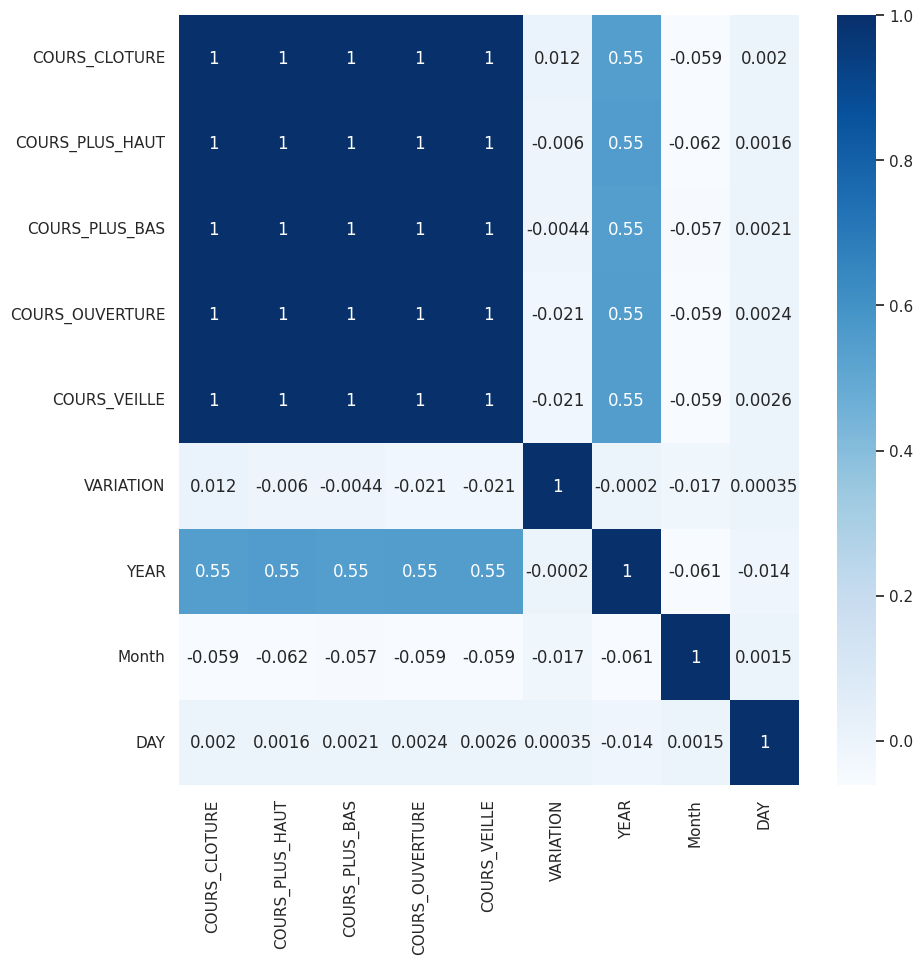

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr.corr(),cbar=True,annot=True,cmap='Blues')

We can note that  the features ['COURS_PLUS_HAUT', 'COURS_PLUS_BAS' 'COURS_OUVERTURE', 'COURS_VEILLE'] have a great positive correlation with our target COURS_CLOTURE, whch is good for us, we see that YEAR has a positive correlation with the target.

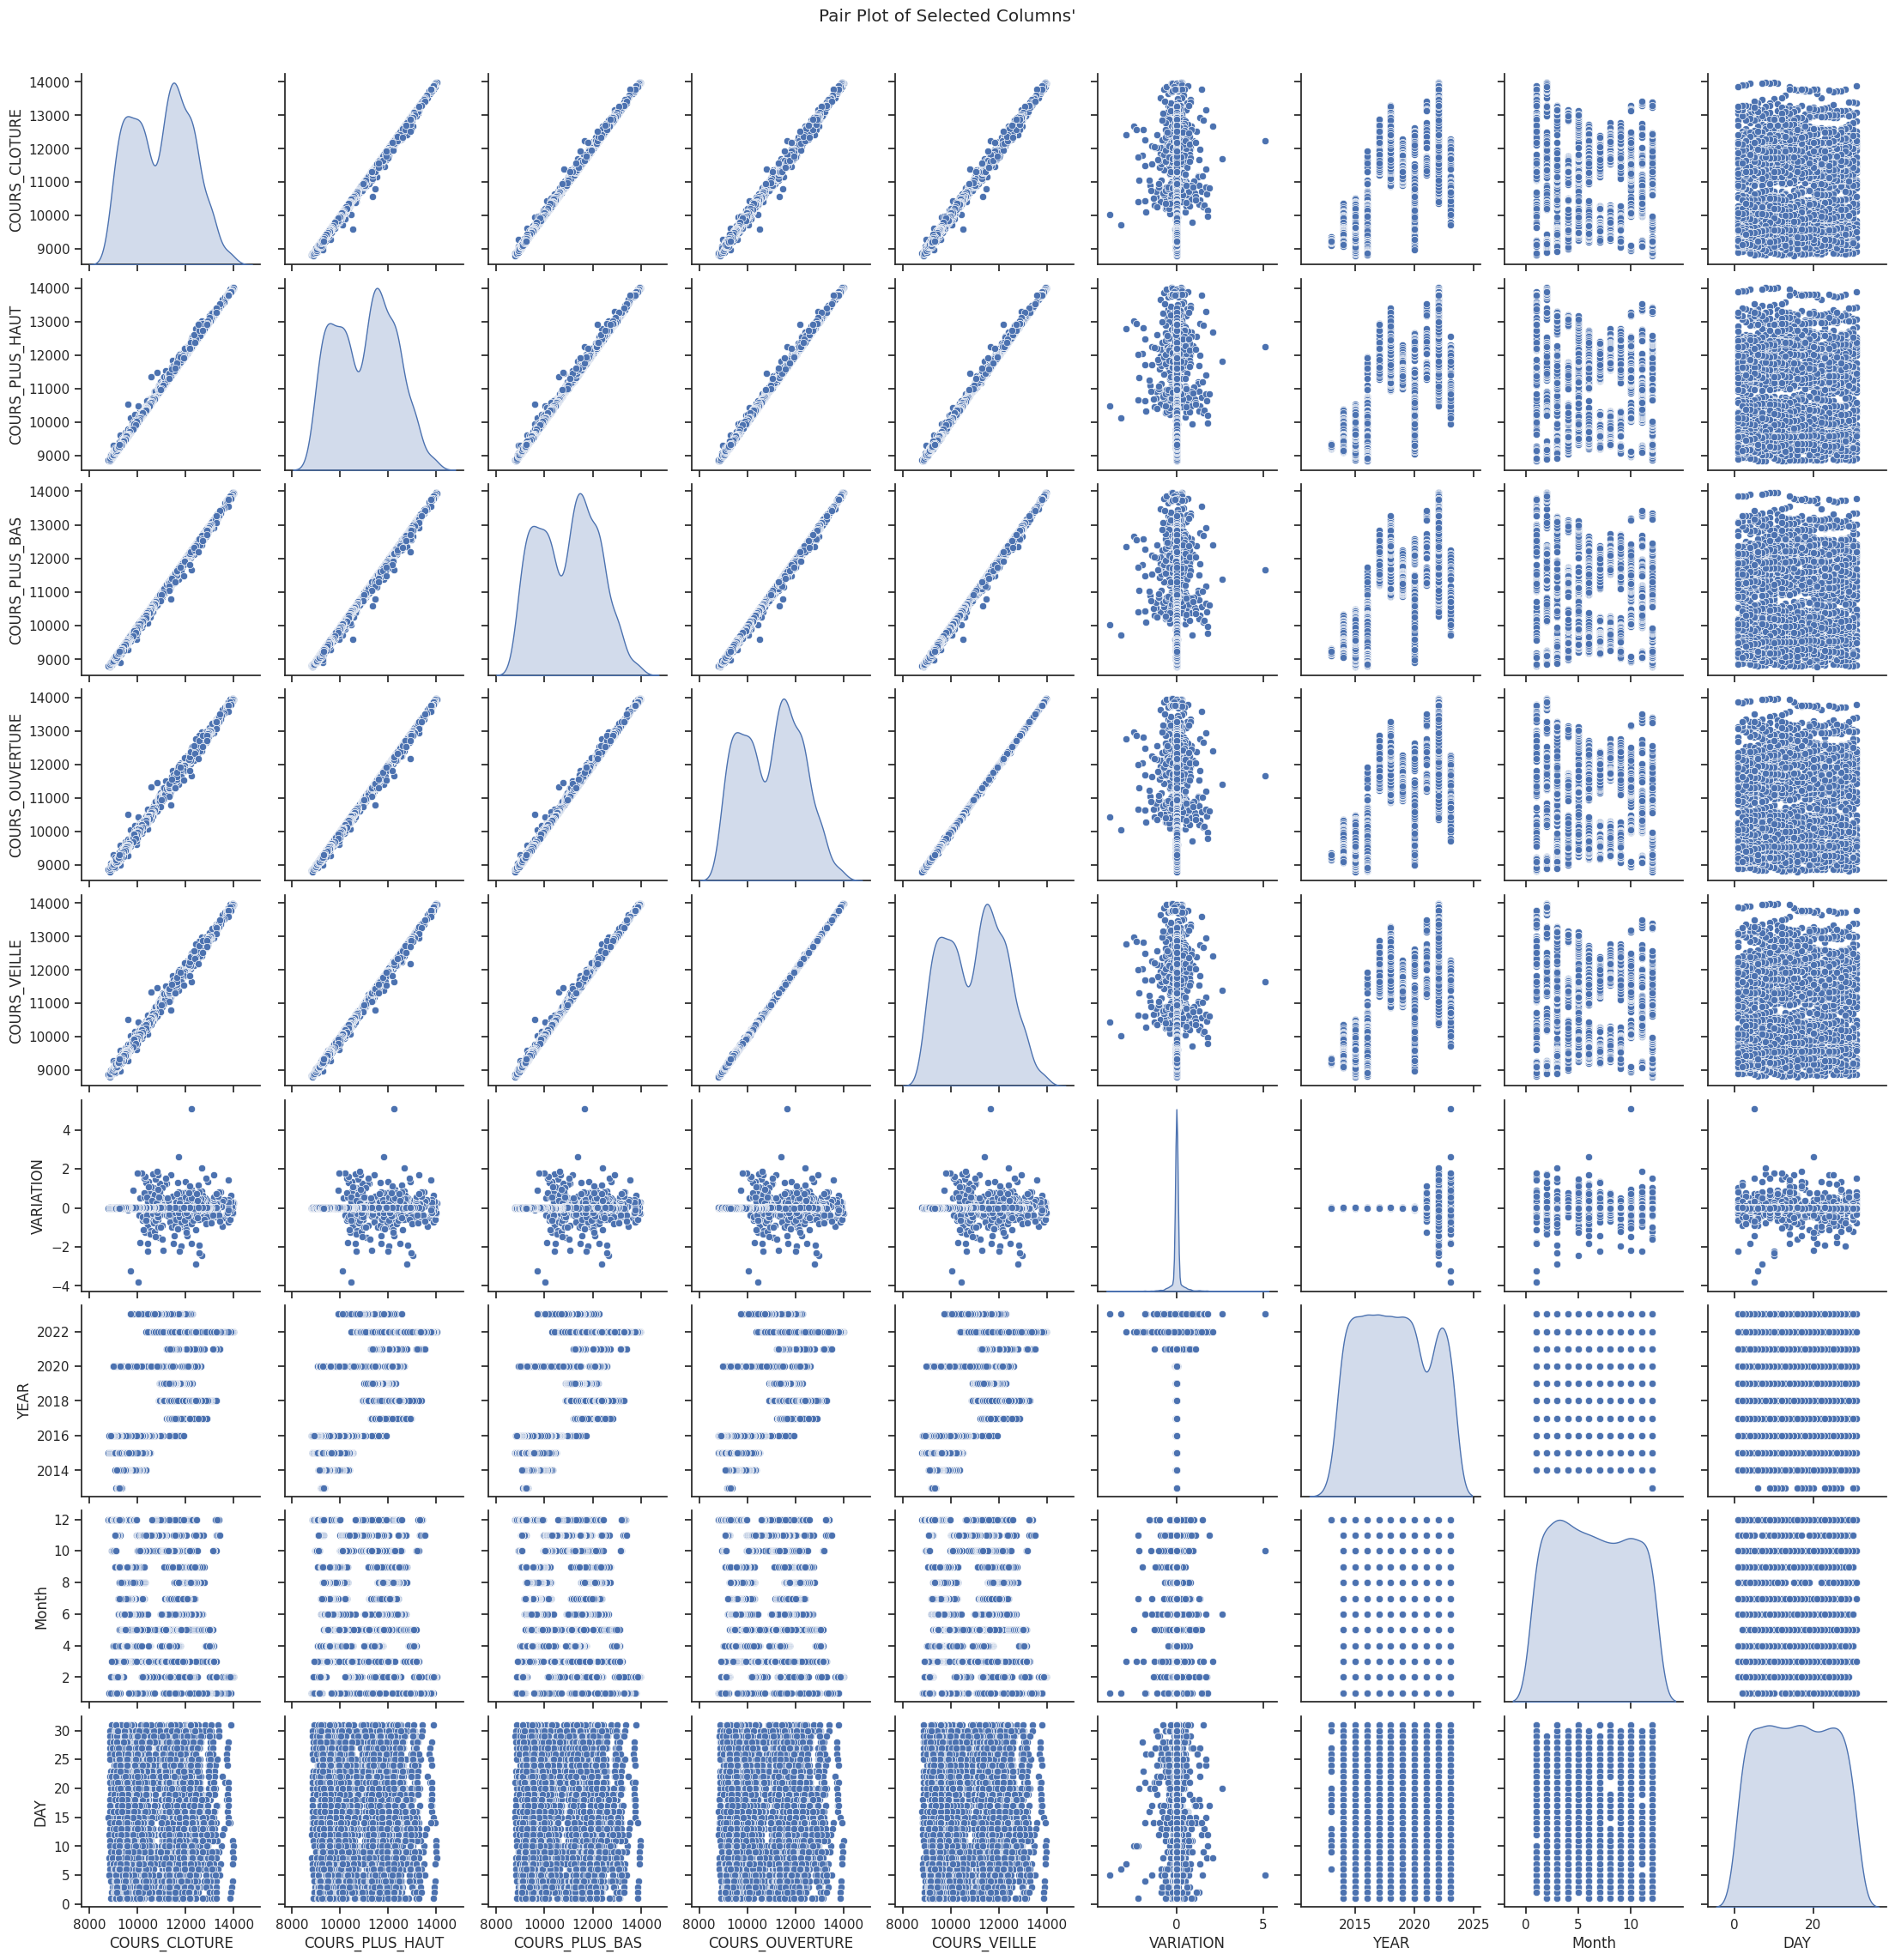

In [ ]:
sns.set(style="ticks")
sns.pairplot(df[num_cols], diag_kind='kde')
plt.suptitle("Pair Plot of Selected Columns'", y=1.02)
plt.show()

# **4. Feature Engineering** #

Let's add some features for forcasting time series.

In [ ]:
df['SEANCE'] = pd.to_datetime(df['SEANCE'], format='%Y-%m-%d %H:%M:%S.%f') # Adjust the format string to include time components

data_feat = pd.DataFrame({
                          "dayofyear": df['SEANCE'].dt.dayofyear,
                          "week": df['SEANCE'].dt.isocalendar().week,
                          "weekday": df['SEANCE'].dt.dayofweek,
                          "quarter": df['SEANCE'].dt.quarter,
                         })
data_feat.head()

dayofyear  week  weekday  quarter
DATE                                         
2023-12-08        342    49        4        4
2023-12-07        341    49        3        4
2023-12-06        340    49        2        4
2023-12-05        339    49        1        4
2023-12-04        338    49        0        4

In [ ]:
# Advanced Temporal Features - Cosine and Sine of the Month
df['cos_month'] = np.cos(2 * np.pi * df['Month'] / 12)
df['sin_month'] = np.sin(2 * np.pi * df['Month'] / 12)

# Month Seasonality
df['MonthSeason'] = df['Month'] % 4

In [ ]:
# Merge the two dataframes

df = pd.concat([df, data_feat ], axis=1)
df.head()

SEANCE  COURS_CLOTURE  COURS_PLUS_HAUT  COURS_PLUS_BAS  \
DATE                                                                    
2023-12-08 2023-12-08       11885.32         11885.32        11824.97   
2023-12-07 2023-12-07       11827.02         11827.02        11757.60   
2023-12-06 2023-12-06       11757.60         11792.95        11718.07   
2023-12-05 2023-12-05       11759.51         11785.10        11709.49   
2023-12-04 2023-12-04       11728.06         11769.43        11702.27   

            COURS_OUVERTURE  COURS_VEILLE  VARIATION  YEAR  Month  DAY  \
DATE                                                                     
2023-12-08         11827.02      11827.02       0.49  2023     12    8   
2023-12-07         11757.60      11757.60       0.59  2023     12    7   
2023-12-06         11759.51      11759.51      -0.02  2023     12    6   
2023-12-05         11728.06      11728.06       0.27  2023     12    5   
2023-12-04         11748.19      11748.19      -0.17  2023     12    4   

            Rolling_Mean  Rolling_Std  cos_month     sin_month  MonthSeason  \
DATE                                                                          
2023-12-08           NaN          NaN        1.0 -2.449294e-16            0   
2023-12-07           NaN          NaN        1.0 -2.449294e-16            0   
2023-12-06           NaN          NaN        1.0 -2.449294e-16            0   
2023-12-05           NaN          NaN        1.0 -2.449294e-16            0   
2023-12-04           NaN          NaN        1.0 -2.449294e-16            0   

            dayofyear  week  weekday  quarter  
DATE                                           
2023-12-08        342    49        4        4  
2023-12-07        341    49        3        4  
2023-12-06        340    49        2        4  
2023-12-05        339    49        1        4  
2023-12-04        338    49        0        4

In [ ]:
df.isnull().sum()

SEANCE              0
COURS_CLOTURE       0
COURS_PLUS_HAUT     0
COURS_PLUS_BAS      0
COURS_OUVERTURE     0
COURS_VEILLE        0
VARIATION           0
YEAR                0
Month               0
DAY                 0
Rolling_Mean       49
Rolling_Std        49
cos_month           0
sin_month           0
MonthSeason         0
dayofyear           0
week                0
weekday             0
quarter             0
dtype: int64

In [ ]:
df['Rolling_Mean'].fillna(df['Rolling_Mean'].mean(), inplace=True)

# Fill missing values in Rolling_Std with the mean of the column
df['Rolling_Std'].fillna(df['Rolling_Std'].mean(), inplace=True)

## *4.1. Mutual Information* ##

Before applying the MI Method, we wikll remove the unacessary columns in our dataframe.

In [ ]:
df

SEANCE  COURS_CLOTURE  COURS_PLUS_HAUT  COURS_PLUS_BAS  \
DATE                                                                    
2023-12-08 2023-12-08       11885.32         11885.32        11824.97   
2023-12-07 2023-12-07       11827.02         11827.02        11757.60   
2023-12-06 2023-12-06       11757.60         11792.95        11718.07   
2023-12-05 2023-12-05       11759.51         11785.10        11709.49   
2023-12-04 2023-12-04       11728.06         11769.43        11702.27   
...               ...            ...              ...             ...   
2013-12-12 2013-12-12        9320.66          9320.66         9241.91   
2013-12-11 2013-12-11        9252.30          9252.30         9194.57   
2013-12-10 2013-12-10        9241.40          9263.15         9196.77   
2013-12-09 2013-12-09        9221.40          9277.00         9199.47   
2013-12-06 2013-12-06        9240.41          9340.03         9240.39   

            COURS_OUVERTURE  COURS_VEILLE  VARIATION  YEAR  Month  DAY  \
DATE                                                                     
2023-12-08         11827.02      11827.02   0.490000  2023     12    8   
2023-12-07         11757.60      11757.60   0.590000  2023     12    7   
2023-12-06         11759.51      11759.51  -0.020000  2023     12    6   
2023-12-05         11728.06      11728.06   0.270000  2023     12    5   
2023-12-04         11748.19      11748.19  -0.170000  2023     12    4   
...                     ...           ...        ...   ...    ...  ...   
2013-12-12          9241.91       9252.30   0.007388  2013     12   12   
2013-12-11          9239.97       9241.40   0.001179  2013     12   11   
2013-12-10          9203.46       9221.40   0.002169  2013     12   10   
2013-12-09          9235.06       9240.41  -0.002057  2013     12    9   
2013-12-06          9310.02       9327.31  -0.009317  2013     12    6   

            Rolling_Mean  Rolling_Std  cos_month     sin_month  MonthSeason  \
DATE                                                                          
2023-12-08  11016.449907   242.252619        1.0 -2.449294e-16            0   
2023-12-07  11016.449907   242.252619        1.0 -2.449294e-16            0   
2023-12-06  11016.449907   242.252619        1.0 -2.449294e-16            0   
2023-12-05  11016.449907   242.252619        1.0 -2.449294e-16            0   
2023-12-04  11016.449907   242.252619        1.0 -2.449294e-16            0   
...                  ...          ...        ...           ...          ...   
2013-12-12   9200.263800    75.437101        1.0 -2.449294e-16            0   
2013-12-11   9200.568800    75.619475        1.0 -2.449294e-16            0   
2013-12-10   9200.222200    75.386812        1.0 -2.449294e-16            0   
2013-12-09   9199.784000    75.194678        1.0 -2.449294e-16            0   
2013-12-06   9199.769000    75.186330        1.0 -2.449294e-16            0   

            dayofyear  week  weekday  quarter  
DATE                                           
2023-12-08        342    49        4        4  
2023-12-07        341    49        3        4  
2023-12-06        340    49        2        4  
2023-12-05        339    49        1        4  
2023-12-04        338    49        0        4  
...               ...   ...      ...      ...  
2013-12-12        346    50        3        4  
2013-12-11        345    50        2        4  
2013-12-10        344    50        1        4  
2013-12-09        343    50        0        4  
2013-12-06        340    49        4        4  

[2366 rows x 19 columns]

In [ ]:
df.isnull().sum()

SEANCE             0
COURS_CLOTURE      0
COURS_PLUS_HAUT    0
COURS_PLUS_BAS     0
COURS_OUVERTURE    0
COURS_VEILLE       0
VARIATION          0
YEAR               0
Month              0
DAY                0
Rolling_Mean       0
Rolling_Std        0
cos_month          0
sin_month          0
MonthSeason        0
dayofyear          0
week               0
weekday            0
quarter            0
dtype: int64

We see that we have some missing values in the column Rolling_Mean and Rolling_Std, we should fill them first

In [ ]:
df.drop('SEANCE', axis=1, inplace=True)

Now we have to create the target variable and the features

In [ ]:
# MI Score for each feature
data=df.copy()
# Creating the dependant and the independant variable
X= data.copy()
y= X.pop("COURS_CLOTURE")

#discrete features
discrete_features = X.dtypes == int
X.head()

COURS_PLUS_HAUT  COURS_PLUS_BAS  COURS_OUVERTURE  COURS_VEILLE  \
DATE                                                                         
2023-12-08         11885.32        11824.97         11827.02      11827.02   
2023-12-07         11827.02        11757.60         11757.60      11757.60   
2023-12-06         11792.95        11718.07         11759.51      11759.51   
2023-12-05         11785.10        11709.49         11728.06      11728.06   
2023-12-04         11769.43        11702.27         11748.19      11748.19   

            VARIATION  YEAR  Month  DAY  Rolling_Mean  Rolling_Std  cos_month  \
DATE                                                                            
2023-12-08       0.49  2023     12    8  11016.449907   242.252619        1.0   
2023-12-07       0.59  2023     12    7  11016.449907   242.252619        1.0   
2023-12-06      -0.02  2023     12    6  11016.449907   242.252619        1.0   
2023-12-05       0.27  2023     12    5  11016.449907   242.252619        1.0   
2023-12-04      -0.17  2023     12    4  11016.449907   242.252619        1.0   

               sin_month  MonthSeason  dayofyear  week  weekday  quarter  
DATE                                                                      
2023-12-08 -2.449294e-16            0        342    49        4        4  
2023-12-07 -2.449294e-16            0        341    49        3        4  
2023-12-06 -2.449294e-16            0        340    49        2        4  
2023-12-05 -2.449294e-16            0        339    49        1        4  
2023-12-04 -2.449294e-16            0        338    49        0        4

The data is ready to go, Let's calculate the MI Score for each feature.

In [ ]:
# Creating MI function
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
# Calculating the MI score

mi_scores = make_mi_scores(X, y, discrete_features=discrete_features)
mi_scores

COURS_PLUS_HAUT    3.618929
COURS_PLUS_BAS     3.478106
COURS_OUVERTURE    2.885171
COURS_VEILLE       2.859076
Rolling_Mean       1.714897
YEAR               0.953391
dayofyear          0.943699
week               0.898150
Rolling_Std        0.731415
Month              0.580272
cos_month          0.344372
sin_month          0.314538
quarter            0.255194
MonthSeason        0.165004
VARIATION          0.164565
DAY                0.000000
weekday            0.000000
Name: MI Scores, dtype: float64

The features DAY, dayofweek and weekday have a score of zero, and we can see that COURS_PLUS_HAUT, COURS_PLUS_BAS, COURS_PLUS_HAUT,
COURS_OUVERTURE and COURS_VEILLE have a big value of MI Score.  

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)

    # Use Seaborn color palette
    colors = sns.color_palette("viridis", len(scores))

    # Plot the bar chart with the specified color palette
    plt.barh(width, scores, color=colors)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

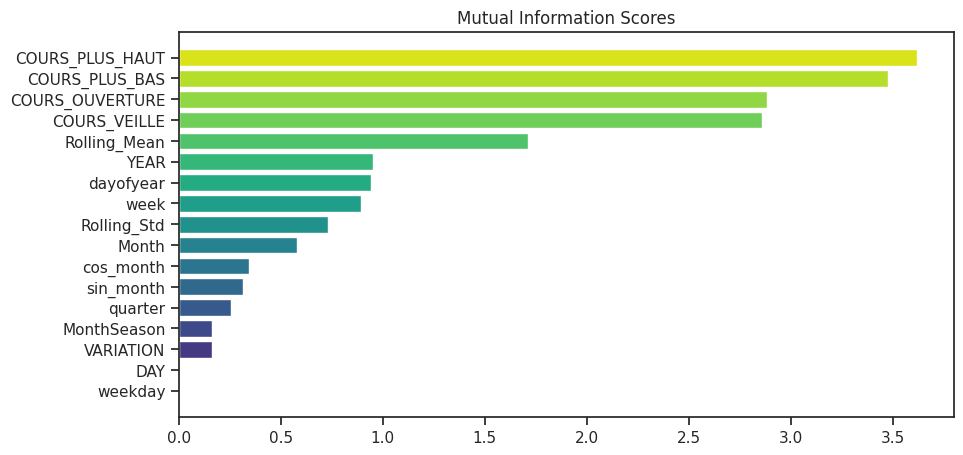

In [ ]:
mi_scores_2 = make_mi_scores(X, y, discrete_features=discrete_features)
plt.figure(dpi=100, figsize=(10, 5))
plot_mi_scores(mi_scores_2)

We can see the difference more clearly in this visualization.

## *4.2. Univariate Selection SelectKBest* ##


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
best_features= SelectKBest(score_func=f_regression, k=5)
fit= best_features.fit(X,y)
dfscores= pd.Series(fit.scores_, name="SelectKBest", index=X.columns)
dfscores = dfscores.sort_values(ascending=False)

#print the scores
dfscores

COURS_PLUS_BAS     1.539401e+06
COURS_PLUS_HAUT    1.189237e+06
COURS_OUVERTURE    6.119653e+05
COURS_VEILLE       6.039137e+05
Rolling_Mean       1.554244e+04
YEAR               1.013266e+03
Rolling_Std        2.338148e+02
week               8.739834e+00
dayofyear          8.300622e+00
Month              8.217522e+00
cos_month          7.645247e+00
quarter            7.420469e+00
sin_month          2.299733e+00
MonthSeason        8.143245e-01
weekday            6.527716e-01
VARIATION          3.309536e-01
DAY                9.243178e-03
Name: SelectKBest, dtype: float64

Same features aretaking the lead with the SelektKBest method too, VARIATION has a negative score with sin_month, the opposite of MI.

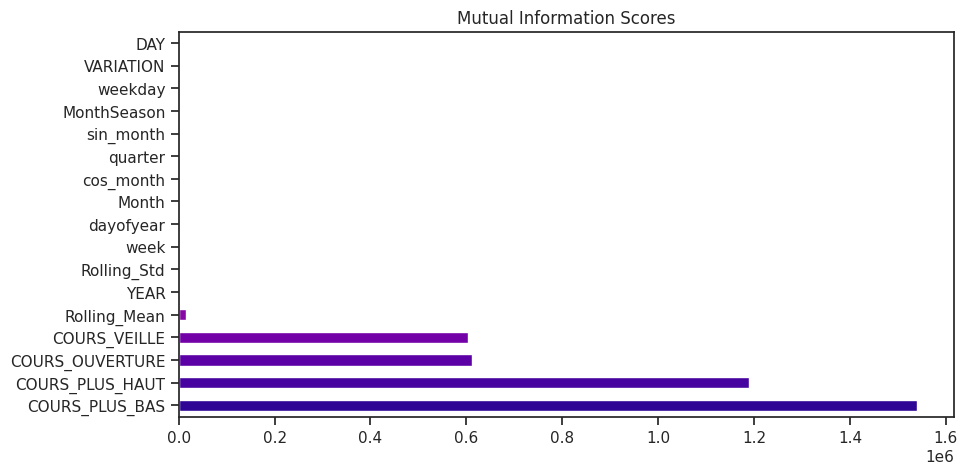

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
colors = sns.color_palette("plasma", len(dfscores))
dfscores.nlargest(64).plot(kind='barh', color=colors)

plt.title("Mutual Information Scores")
plt.show()


The features with low scores will be kept for now, and after the first test we will decide if we're gonna keep them or not.

# **5. Modeling** #

## *5.1. Spliting the Data* ##

First of all we should split the data into a train and test dataset, to do this we will use the test_train_split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Specify the percentage for the training set
train_percentage = 0.8

# Find the index corresponding to the desired split point
split_index = int(len(df) * train_percentage)

# Split the data
df1=df.copy()
train, test = df1.iloc[:split_index], df1.iloc[split_index:]

X_train, y_train = train.drop('COURS_CLOTURE', axis=1), train['COURS_CLOTURE']
X_test, y_test = test.drop('COURS_CLOTURE', axis=1), test['COURS_CLOTURE']

X_test


COURS_PLUS_HAUT  COURS_PLUS_BAS  COURS_OUVERTURE  COURS_VEILLE  \
DATE                                                                         
2015-11-03      9104.709961     9054.830078      9078.969727   9084.320312   
2015-11-02      9095.969727     9059.349609      9073.759766   9081.799805   
2015-10-30      9081.799805     9000.750000      9025.509766   9032.780273   
2015-10-29      9032.780273     8982.650391      8984.839844   8993.290039   
2015-10-28      9002.169922     8977.969727      8981.540039   8979.629883   
...                     ...             ...              ...           ...   
2013-12-12      9320.660000     9241.910000      9241.910000   9252.300000   
2013-12-11      9252.300000     9194.570000      9239.970000   9241.400000   
2013-12-10      9263.150000     9196.770000      9203.460000   9221.400000   
2013-12-09      9277.000000     9199.470000      9235.060000   9240.410000   
2013-12-06      9340.030000     9240.390000      9310.020000   9327.310000   

            VARIATION  YEAR  Month  DAY  Rolling_Mean  Rolling_Std  cos_month  \
DATE                                                                            
2015-11-03   0.002211  2015     11    3   8994.105723   149.356012   0.866025   
2015-11-02   0.000278  2015     11    2   8998.035137   149.087701   0.866025   
2015-10-30   0.005427  2015     10   30   9002.297734   148.358547   0.500000   
2015-10-29   0.004391  2015     10   29   9005.882148   146.848972   0.500000   
2015-10-28   0.001521  2015     10   28   9008.702344   145.183470   0.500000   
...               ...   ...    ...  ...           ...          ...        ...   
2013-12-12   0.007388  2013     12   12   9200.263800    75.437101   1.000000   
2013-12-11   0.001179  2013     12   11   9200.568800    75.619475   1.000000   
2013-12-10   0.002169  2013     12   10   9200.222200    75.386812   1.000000   
2013-12-09  -0.002057  2013     12    9   9199.784000    75.194678   1.000000   
2013-12-06  -0.009317  2013     12    6   9199.769000    75.186330   1.000000   

               sin_month  MonthSeason  dayofyear  week  weekday  quarter  
DATE                                                                      
2015-11-03 -5.000000e-01            3        307    45        1        4  
2015-11-02 -5.000000e-01            3        306    45        0        4  
2015-10-30 -8.660254e-01            2        303    44        4        4  
2015-10-29 -8.660254e-01            2        302    44        3        4  
2015-10-28 -8.660254e-01            2        301    44        2        4  
...                  ...          ...        ...   ...      ...      ...  
2013-12-12 -2.449294e-16            0        346    50        3        4  
2013-12-11 -2.449294e-16            0        345    50        2        4  
2013-12-10 -2.449294e-16            0        344    50        1        4  
2013-12-09 -2.449294e-16            0        343    50        0        4  
2013-12-06 -2.449294e-16            0        340    49        4        4  

[474 rows x 17 columns]

## *5.2, Scaling and Normalization* ##

In this first test, we are gonna scale and normalize only the continous features, then we will apply it on all features.

In [ ]:
X_train

COURS_PLUS_HAUT  COURS_PLUS_BAS  COURS_OUVERTURE  COURS_VEILLE  \
DATE                                                                         
2023-12-08     11885.320000    11824.970000     11827.020000  11827.020000   
2023-12-07     11827.020000    11757.600000     11757.600000  11757.600000   
2023-12-06     11792.950000    11718.070000     11759.510000  11759.510000   
2023-12-05     11785.100000    11709.490000     11728.060000  11728.060000   
2023-12-04     11769.430000    11702.270000     11748.190000  11748.190000   
...                     ...             ...              ...           ...   
2015-11-11      9272.160156     9213.110352      9226.269531   9212.450195   
2015-11-10      9247.969727     9182.959961      9237.049805   9232.250000   
2015-11-09      9232.250000     9176.679688      9198.750000   9172.839844   
2015-11-05      9177.059570     9073.950195      9113.250000   9113.230469   
2015-11-04      9142.059570     9059.690430      9089.230469   9104.410156   

            VARIATION  YEAR  Month  DAY  Rolling_Mean  Rolling_Std  cos_month  \
DATE                                                                            
2023-12-08   0.490000  2023     12    8  11016.449907   242.252619   1.000000   
2023-12-07   0.590000  2023     12    7  11016.449907   242.252619   1.000000   
2023-12-06  -0.020000  2023     12    6  11016.449907   242.252619   1.000000   
2023-12-05   0.270000  2023     12    5  11016.449907   242.252619   1.000000   
2023-12-04  -0.170000  2023     12    4  11016.449907   242.252619   1.000000   
...               ...   ...    ...  ...           ...          ...        ...   
2015-11-11   0.006059  2015     11   11   8964.223711   140.341841   0.866025   
2015-11-10  -0.002145  2015     11   10   8971.140918   143.909511   0.866025   
2015-11-09   0.006477  2015     11    9   8978.473320   147.713497   0.866025   
2015-11-05   0.006541  2015     11    5   8984.561309   149.349782   0.866025   
2015-11-04   0.000969  2015     11    4   8989.577324   149.375852   0.866025   

               sin_month  MonthSeason  dayofyear  week  weekday  quarter  
DATE                                                                      
2023-12-08 -2.449294e-16            0        342    49        4        4  
2023-12-07 -2.449294e-16            0        341    49        3        4  
2023-12-06 -2.449294e-16            0        340    49        2        4  
2023-12-05 -2.449294e-16            0        339    49        1        4  
2023-12-04 -2.449294e-16            0        338    49        0        4  
...                  ...          ...        ...   ...      ...      ...  
2015-11-11 -5.000000e-01            3        315    46        2        4  
2015-11-10 -5.000000e-01            3        314    46        1        4  
2015-11-09 -5.000000e-01            3        313    46        0        4  
2015-11-05 -5.000000e-01            3        309    45        3        4  
2015-11-04 -5.000000e-01            3        308    45        2        4  

[1892 rows x 17 columns]

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features_to_scale = ['COURS_PLUS_HAUT', 'COURS_PLUS_BAS', 'COURS_OUVERTURE', 'COURS_VEILLE',
       'VARIATION']
features_to_keep = ['YEAR', 'Month', 'DAY', 'Rolling_Mean', 'Rolling_Std',
       'cos_month', 'sin_month', 'MonthSeason', 'dayofyear', 'week', 'weekday',
       'quarter']

# Create a StandardScaler for the features to scale
scaler = StandardScaler()

# Fit and transform the selected features in the training set
X_train_scaled_features = pd.DataFrame(scaler.fit_transform(X_train[features_to_scale]), columns=features_to_scale, index=X_train.index)

# Combine the scaled features with the features to keep
X_train_combined = pd.concat([X_train_scaled_features, X_train[features_to_keep]], axis=1)

# Use the same scaler to transform the selected features in the test set
X_test_scaled_features = pd.DataFrame(scaler.transform(X_test[features_to_scale]), columns=features_to_scale, index=X_test.index)

# Combine the scaled features with the features to keep in the test set
X_test_combined = pd.concat([X_test_scaled_features, X_test[features_to_keep]], axis=1)


In [ ]:
X_test= X_test_combined.copy()
X_train=X_train_combined.copy()

Now we are ready to do the fisrt test of our data with Time series forcasting Machine Learning Models.

In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Set the number of splits for TimeSeriesSplit
n_splits = 5  # Adjust the number of splits as needed

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

df1=df.copy()

# Create a list of models to test, including LSTM
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'ARIMA': ARIMA(df1['COURS_CLOTURE'], order=(1, 1, 1)),
    'SARIMAX': SARIMAX(endog=df1['COURS_CLOTURE'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)),
    'LSTM': Sequential([
        LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dense(units=1)
    ])
}

# Iterate through the splits
for train_index, test_index in tscv.split(df1):
    train_data = df1.iloc[train_index]
    test_data = df1.iloc[test_index]

    # Prepare the training and testing data
    X_train, y_train = train_data.drop('COURS_CLOTURE', axis=1), train_data['COURS_CLOTURE']
    X_test, y_test = test_data.drop('COURS_CLOTURE', axis=1), test_data['COURS_CLOTURE']

    # Train and evaluate each model
    for model_name, model in models.items():
        try:
            if model_name == 'ARIMA':
                # ARIMA
                model_fit = model.fit()
                y_pred = model_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1)
            elif model_name == 'SARIMAX':
                # SARIMAX
                model_fit = model.fit()
                y_pred = model_fit.get_prediction(start=len(X_train), end=len(X_train) + len(X_test) - 1, exog=X_test).predicted_mean
            elif model_name == 'LSTM':
                # LSTM
                X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
                X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
                model.compile(optimizer='adam', loss='mean_squared_error')
                model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=0)
                y_pred = model.predict(X_test_lstm)
                y_pred = y_pred.flatten()
            else:
                # For standard models
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            print(f'MSE {model_name}: {mse}')

        except Exception as e:
            print(f'Error for {model_name}: {str(e)}')

# Note: The LSTM model requires additional tuning and preprocessing steps.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency infor

MSE Linear Regression: 2996.0670442707997
MSE Random Forest: 156962.5284496543
MSE XGBoost: 166419.7240975236
MSE ARIMA: 6934.181164164509
MSE SARIMAX: 7172.589583499048
Error for LSTM: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
MSE Linear Regression: 2249.9749389502967
MSE Random Forest: 3255.1207658928456
MSE XGBoost: 4415.949252210588
MSE ARIMA: 11116.321424789448
MSE SARIMAX: 11190.77187650261
Error for LSTM: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
MSE Linear Regression: 1004.3470352179706
MSE Random Forest: 1536.9205708947263
MSE XGBoost: 1597.4677356756222
MSE ARIMA: 4366.937875197162
MSE SARIMAX: 4392.041380180069
Error for LSTM: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
MSE Linear Regression: 832.8424948956547
MSE Random Forest: 3901.1591039519712
MSE XGBoost: 8658.192163406322
MSE ARIMA: 4501.381620669417
MSE SARIMAX: 4600.224533441428
Error for LSTM: Failed to convert a N

In [ ]:
    import pandas as pd
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor
    from xgboost import XGBRegressor
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense



    df1=df.copy()

    # Create a list of models to test, including LSTM
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(),
        'XGBoost': XGBRegressor(),
        'ARIMA': ARIMA(df1['COURS_CLOTURE'], order=(1, 1, 1)),
        'SARIMAX': SARIMAX(endog=df1['COURS_CLOTURE'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)),
        'LSTM': Sequential([
            LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)),
            Dense(units=1)
        ])
    }

    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split

    features_to_scale = ['COURS_PLUS_HAUT', 'COURS_PLUS_BAS', 'COURS_OUVERTURE', 'COURS_VEILLE',
          'VARIATION']
    features_to_keep = ['YEAR', 'Month', 'DAY', 'Rolling_Mean', 'Rolling_Std',
          'cos_month', 'sin_month', 'MonthSeason', 'dayofyear', 'week', 'weekday',
          'quarter']


    # Specify the percentage for the training set
    train_percentage = 0.8

    # Find the index corresponding to the desired split point
    split_index = int(len(df) * train_percentage)

    # Split the data
    df1=df.copy()
    train, test = df1.iloc[:split_index], df1.iloc[split_index:]

    X_train, y_train = train.drop('COURS_CLOTURE', axis=1), train['COURS_CLOTURE']
    X_test, y_test = test.drop('COURS_CLOTURE', axis=1), test['COURS_CLOTURE']

     # Create a StandardScaler for the features to scale
    scaler = StandardScaler()

    # Fit and transform the selected features in the training set
    X_train_scaled_features = pd.DataFrame(scaler.fit_transform(X_train[features_to_scale]), columns=features_to_scale, index=X_train.index)

    # Combine the scaled features with the features to keep
    X_train_combined = pd.concat([X_train_scaled_features, X_train[features_to_keep]], axis=1)

    # Use the same scaler to transform the selected features in the test set
    X_test_scaled_features = pd.DataFrame(scaler.transform(X_test[features_to_scale]), columns=features_to_scale, index=X_test.index)

    # Combine the scaled features with the features to keep in the test set
    X_test_combined = pd.concat([X_test_scaled_features, X_test[features_to_keep]], axis=1)

    X_test=X_test_combined.copy()
    X_train=X_train_combined.copy()

    # Train and evaluate each model
    for model_name, model in models.items():
        try:
            if model_name == 'ARIMA':
                # ARIMA
                model_fit = model.fit()
                y_pred = model_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1)
            elif model_name == 'SARIMAX':
                # SARIMAX
                model_fit = model.fit()
                y_pred = model_fit.get_prediction(start=len(X_train), end=len(X_train) + len(X_test) - 1, exog=X_test).predicted_mean
            elif model_name == 'LSTM':
                # LSTM
                X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
                X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
                model.compile(optimizer='adam', loss='mean_squared_error')
                model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=0)
                y_pred = model.predict(X_test_lstm)
                y_pred = y_pred.flatten()
            else:
                # For standard models
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            print(f'MSE {model_name}: {mse}')

            if len(y_test) != len(y_pred):
              raise ValueError("Input arrays must have the same length.")

            # Calculate SMAPE
            numerator = 2 * np.abs(y_pred - y_test)
            denominator = np.abs(y_test) + np.abs(y_pred)
            smape = np.mean(np.divide(numerator, denominator, out=np.zeros_like(numerator), where=denominator!=0)) * 100
            print(f'SMAPE {model_name}: {smape}')

        except Exception as e:
            print(f'Error for {model_name}: {str(e)}')

# Note: The LSTM model requires additional tuning and preprocessing steps.


MSE Linear Regression: 463.157851400143
SMAPE Linear Regression: 0.1759671926670743


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency infor

MSE Random Forest: 563.0341390658155
SMAPE Random Forest: 0.18813560604424645
MSE XGBoost: 1425.7087820001052
SMAPE XGBoost: 0.30065458014296287
MSE ARIMA: 2260.834580393287
SMAPE ARIMA: 0.3631950250742385
MSE SARIMAX: 2335.652637105341
SMAPE SARIMAX: 0.367974822791295
Error for LSTM: Failed to convert a NumPy array to a Tensor (Unsupported object type float).


After the first test we see that Linear Regression has the smallest value of MSE, and the smallest value of SMAPE too, that can tell us that Linear Regression is performing good. Now let's remove the features that we tought after the EDA and feature engineering that they want help us and will cause problems to our model.

In [ ]:
df2=df.copy()

In [ ]:
feat_to_drop = ['DAY', 'dayofyear', 'weekday']
df2.drop(feat_to_drop, axis=1, inplace=True)
df2

COURS_CLOTURE  COURS_PLUS_HAUT  COURS_PLUS_BAS  COURS_OUVERTURE  \
DATE                                                                          
2023-12-08       11885.32         11885.32        11824.97         11827.02   
2023-12-07       11827.02         11827.02        11757.60         11757.60   
2023-12-06       11757.60         11792.95        11718.07         11759.51   
2023-12-05       11759.51         11785.10        11709.49         11728.06   
2023-12-04       11728.06         11769.43        11702.27         11748.19   
...                   ...              ...             ...              ...   
2013-12-12        9320.66          9320.66         9241.91          9241.91   
2013-12-11        9252.30          9252.30         9194.57          9239.97   
2013-12-10        9241.40          9263.15         9196.77          9203.46   
2013-12-09        9221.40          9277.00         9199.47          9235.06   
2013-12-06        9240.41          9340.03         9240.39          9310.02   

            COURS_VEILLE  VARIATION  YEAR  Month  Rolling_Mean  Rolling_Std  \
DATE                                                                          
2023-12-08      11827.02   0.490000  2023     12  11016.449907   242.252619   
2023-12-07      11757.60   0.590000  2023     12  11016.449907   242.252619   
2023-12-06      11759.51  -0.020000  2023     12  11016.449907   242.252619   
2023-12-05      11728.06   0.270000  2023     12  11016.449907   242.252619   
2023-12-04      11748.19  -0.170000  2023     12  11016.449907   242.252619   
...                  ...        ...   ...    ...           ...          ...   
2013-12-12       9252.30   0.007388  2013     12   9200.263800    75.437101   
2013-12-11       9241.40   0.001179  2013     12   9200.568800    75.619475   
2013-12-10       9221.40   0.002169  2013     12   9200.222200    75.386812   
2013-12-09       9240.41  -0.002057  2013     12   9199.784000    75.194678   
2013-12-06       9327.31  -0.009317  2013     12   9199.769000    75.186330   

            cos_month     sin_month  MonthSeason  week  quarter  
DATE                                                             
2023-12-08        1.0 -2.449294e-16            0    49        4  
2023-12-07        1.0 -2.449294e-16            0    49        4  
2023-12-06        1.0 -2.449294e-16            0    49        4  
2023-12-05        1.0 -2.449294e-16            0    49        4  
2023-12-04        1.0 -2.449294e-16            0    49        4  
...               ...           ...          ...   ...      ...  
2013-12-12        1.0 -2.449294e-16            0    50        4  
2013-12-11        1.0 -2.449294e-16            0    50        4  
2013-12-10        1.0 -2.449294e-16            0    50        4  
2013-12-09        1.0 -2.449294e-16            0    50        4  
2013-12-06        1.0 -2.449294e-16            0    49        4  

[2366 rows x 15 columns]

Now that we have a new dataframe, we will apply the same approach to this dataframe, by testing with the same models.

In [ ]:
    import pandas as pd
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor
    from xgboost import XGBRegressor
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense

    df1=df2.copy()

    # Create a list of models to test, including LSTM
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(),
        'XGBoost': XGBRegressor(),
        'ARIMA': ARIMA(df1['COURS_CLOTURE'], order=(1, 1, 1)),
        'SARIMAX': SARIMAX(endog=df1['COURS_CLOTURE'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)),
        'LSTM': Sequential([
            LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)),
            Dense(units=1)
        ])
    }

    # Specify the percentage for the training set
    train_percentage = 0.8

    # Find the index corresponding to the desired split point
    split_index = int(len(df) * train_percentage)

    # Split the data
    train, test = df1.iloc[:split_index], df1.iloc[split_index:]

    X_train, y_train = train.drop('COURS_CLOTURE', axis=1), train['COURS_CLOTURE']
    X_test, y_test = test.drop('COURS_CLOTURE', axis=1), test['COURS_CLOTURE']

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train and evaluate each model
    for model_name, model in models.items():
        try:
            if model_name == 'ARIMA':
                # ARIMA
                model_fit = model.fit()
                y_pred = model_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1)
            elif model_name == 'SARIMAX':
                # SARIMAX
                model_fit = model.fit()
                y_pred = model_fit.get_prediction(start=len(X_train), end=len(X_train) + len(X_test) - 1, exog=X_test).predicted_mean
            elif model_name == 'LSTM':
                # LSTM
                X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
                X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
                model.compile(optimizer='adam', loss='mean_squared_error')
                model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=0)
                y_pred = model.predict(X_test_lstm)
                y_pred = y_pred.flatten()
            else:
                # For standard models
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            print(f'MSE {model_name}: {mse}')

            if len(y_test) != len(y_pred):
              raise ValueError("Input arrays must have the same length.")

            # Calculate SMAPE
            numerator = 2 * np.abs(y_pred - y_test)
            denominator = np.abs(y_test) + np.abs(y_pred)
            smape = np.mean(np.divide(numerator, denominator, out=np.zeros_like(numerator), where=denominator!=0)) * 100
            print(f'SMAPE {model_name}: {smape}')

        except Exception as e:
            print(f'Error for {model_name}: {str(e)}')

# Note: The LSTM model requires additional tuning and preprocessing steps.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency infor

MSE Linear Regression: 447.81714358505036
SMAPE Linear Regression: 0.1747861802183452
MSE Random Forest: 525.999545129452
SMAPE Random Forest: 0.18363682155618288
MSE XGBoost: 1050.8630572947015
SMAPE XGBoost: 0.2543677438603389
MSE ARIMA: 2260.834580393287
SMAPE ARIMA: 0.3631950250742385
MSE SARIMAX: 2335.652637105341
SMAPE SARIMAX: 0.367974822791295
Error for LSTM: 'numpy.ndarray' object has no attribute 'values'


we see that the Linear Regression is the best module with its performence, even after we removed some columns. we wil keep the current data, and note that this time we scaled and normalized all the features even those that are not continous, and we got the same results.

# **6. Fine Tuning hyperparameters** #

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Specify the hyperparameters and their potential values for Linear Regression
linear_reg_params = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [None, 1, 2, 4, -1],
    'positive': [True, False]
}

# Create a Linear Regression model
linear_reg = LinearRegression()

# Specify the percentage for the training set
train_percentage = 0.8

# Find the index corresponding to the desired split point
split_index = int(len(df) * train_percentage)

# Split the data
df1=df2.copy()
train, test = df1.iloc[:split_index], df1.iloc[split_index:]

X_train, y_train = train.drop('COURS_CLOTURE', axis=1), train['COURS_CLOTURE']
X_test, y_test = test.drop('COURS_CLOTURE', axis=1), test['COURS_CLOTURE']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform grid search for Linear Regression
grid_search = GridSearchCV(linear_reg, linear_reg_params, cv=TimeSeriesSplit(n_splits=5), scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best Linear Regression model from the grid search
best_linear_reg = grid_search.best_estimator_

# Evaluate the best Linear Regression model
y_pred = best_linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE Linear Regression: {mse}')

mae= mean_absolute_error(y_test, y_pred)
print(f'MAE Linear Regression: {mae}')

# Calculate SMAPE
numerator = 2 * np.abs(y_pred - y_test)
denominator = np.abs(y_test) + np.abs(y_pred)
smape = np.mean(np.divide(numerator, denominator, out=np.zeros_like(numerator), where=denominator != 0)) * 100
print(f'SMAPE Linear Regression: {smape}')

print("Best Hyperparameters for Linear Regression:")
print(grid_search.best_params_)


MSE Linear Regression: 447.81714358505036
MAE Linear Regression: 16.906528677167785
SMAPE Linear Regression: 0.1747861802183452
Best Hyperparameters for Linear Regression:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.linear_model import LinearRegression

# Create a list of models with default and potential hyperparameters
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'positive': [True, False]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}


# Specify the percentage for the training set
train_percentage = 0.8

# Find the index corresponding to the desired split point
split_index = int(len(df) * train_percentage)

# Split the data
df1=df2.copy()
train, test = df1.iloc[:split_index], df1.iloc[split_index:]

X_train, y_train = train.drop('COURS_CLOTURE', axis=1), train['COURS_CLOTURE']
X_test, y_test = test.drop('COURS_CLOTURE', axis=1), test['COURS_CLOTURE']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform grid search for each model
for model_name, model_info in models.items():
    model = model_info['model']
    params = model_info['params']

    if params:
        grid_search = GridSearchCV(model, params, cv=TimeSeriesSplit(n_splits=5), scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        print(f'Best hyperparameters for {model_name}: {best_params}')
        mse = mean_squared_error(y_test, y_pred)
        print(f'MSE Linear Regression: {mse}')

Best hyperparameters for Linear Regression: {'fit_intercept': True, 'positive': False}
MSE Linear Regression: 447.81714358505036
Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
MSE Linear Regression: 447.81714358505036
Best hyperparameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
MSE Linear Regression: 447.81714358505036


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
import numpy as np

# Specify the percentage for the training set
train_percentage = 0.8

# Find the index corresponding to the desired split point
split_index = int(len(df) * train_percentage)

# Split the data
df1 = df2.copy()
train, test = df1.iloc[:split_index], df1.iloc[split_index:]

X_train, y_train = train.drop('COURS_CLOTURE', axis=1), train['COURS_CLOTURE']
X_test, y_test = test.drop('COURS_CLOTURE', axis=1), test['COURS_CLOTURE']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ARIMA hyperparameter tuning
arima_params = {'order': [(1, 1, 1), (2, 1, 1), (1, 2, 1)]}
best_arima_mse = float('inf')
best_arima_params = None

for order in arima_params['order']:
    arima_model = ARIMA(df1['COURS_CLOTURE'], order=order)
    try:
        arima_model_fit = arima_model.fit()
        y_pred_arima = arima_model_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1)
        arima_mse = mean_squared_error(y_test, y_pred_arima)
        if arima_mse < best_arima_mse:
            best_arima_mse = arima_mse
            best_arima_params = {'order': order}
    except Exception as e:
        print(f'Error for ARIMA with order {order}: {str(e)}')

print(f'Best hyperparameters for ARIMA: {best_arima_params}')
print(f'MSE ARIMA: {best_arima_mse}')

# SARIMAX hyperparameter tuning
sarimax_params = {'order': [(1, 1, 1), (2, 1, 1), (1, 2, 1)],
                  'seasonal_order': [(1, 1, 1, 12), (1, 2, 1, 12), (2, 1, 1, 12)]}
best_sarimax_mse = float('inf')
best_sarimax_params = None

for order in sarimax_params['order']:
    for seasonal_order in sarimax_params['seasonal_order']:
        sarimax_model = SARIMAX(endog=df1['COURS_CLOTURE'], order=order, seasonal_order=seasonal_order)
        try:
            sarimax_model_fit = sarimax_model.fit()
            y_pred_sarimax = sarimax_model_fit.get_prediction(start=len(X_train), end=len(X_train) + len(X_test) - 1, exog=X_test).predicted_mean
            sarimax_mse = mean_squared_error(y_test, y_pred_sarimax)
            if sarimax_mse < best_sarimax_mse:
                best_sarimax_mse = sarimax_mse
                best_sarimax_params = {'order': order, 'seasonal_order': seasonal_order}
        except Exception as e:
            print(f'Error for SARIMAX with order {order} and seasonal_order {seasonal_order}: {str(e)}')

print(f'Best hyperparameters for SARIMAX: {best_sarimax_params}')
print(f'MSE SARIMAX: {best_sarimax_mse}')

# LSTM hyperparameter tuning
lstm_params = {'epochs': [50, 100], 'batch_size': [32, 64]}
best_lstm_mse = float('inf')
best_lstm_params = None

for epoch in lstm_params['epochs']:
    for batch_size in lstm_params['batch_size']:
        lstm_model = Sequential([
            LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)),
            Dense(units=1)
        ])
        try:
            lstm_model.compile(optimizer='adam', loss='mean_squared_error')
            lstm_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=epoch, batch_size=batch_size, verbose=0)
            y_pred_lstm = lstm_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
            y_pred_lstm = y_pred_lstm.flatten()
            lstm_mse = mean_squared_error(y_test, y_pred_lstm)
            if lstm_mse < best_lstm_mse:
                best_lstm_mse = lstm_mse
                best_lstm_params = {'epochs': epoch, 'batch_size': batch_size}
        except Exception as e:
            print(f'Error for LSTM with epochs {epoch} and batch_size {batch_size}: {str(e)}')

print(f'Best hyperparameters for LSTM: {best_lstm_params}')
print(f'MSE LSTM: {best_lstm_mse}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency infor

Best hyperparameters for ARIMA: {'order': (2, 1, 1)}
MSE ARIMA: 2259.22407485619


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency infor

Best hyperparameters for SARIMAX: {'order': (1, 1, 1), 'seasonal_order': (2, 1, 1, 12)}
MSE SARIMAX: 2331.6672988870155
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Best hyperparameters for LSTM: {'epochs': 100, 'batch_size': 64}
MSE LSTM: 2253.806014272017


Finally we got the best moel with the best parameters. The visual bellow represents the comparaison between The Test and The Predictions of our model.

In [ ]:
import plotly.graph_objects as go

baseline = df1['COURS_CLOTURE'].min()
max_value = df1['COURS_CLOTURE'].max()

# Create a Plotly figure
fig = go.Figure()

# Add trace for the COURS_CLOTURE column with baseline set to 0
fig.add_trace(go.Scatter(x=df.index, y=y_test - baseline, mode='lines', name='Test'))
fig.add_trace(go.Scatter(x=df.index, y=y_pred - baseline, mode='lines', name='Prediction'))


# Customize the layout with design elements
fig.update_layout(
    title="Prediction VS Test",
    xaxis_title='Date',
    yaxis_title='Prix des Actions (MAD)',
    template="plotly_white",
    showlegend=True,
    autosize=False,
    width=1000,
    height=500,
)

fig.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming 'df1' is your DataFrame and 'COURS_CLOTURE' is the target column
# Replace them with your actual DataFrame and column names

# Specify the parameters for Linear Regression
linear_reg_params = {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

# Create a Linear Regression model with specified parameters
model = LinearRegression(**linear_reg_params)

# Perform time series split
time_series_cv = TimeSeriesSplit(n_splits=5)

i = 0
for train_index, test_index in time_series_cv.split(df1):
    print('----- ----- ----')
    print("TRAIN:", train_index[0], 'to', train_index[-1])
    print("TEST:", test_index[0], 'to', test_index[-1])

    x_train = df1.iloc[train_index[0]:train_index[-1]].drop('COURS_CLOTURE', axis=1)
    y_train = df1.iloc[train_index[0]:train_index[-1]]['COURS_CLOTURE']
    x_valid = df1.iloc[test_index[0]:test_index[-1]].drop('COURS_CLOTURE', axis=1)
    y_valid = df1.iloc[test_index[0]:test_index[-1]]['COURS_CLOTURE']

    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_valid_scaled = scaler.transform(x_valid)

    print('Model training on set', i+1)
    model.fit(x_train_scaled, y_train)
    preds_valid = model.predict(x_valid_scaled)
    rmse = sqrt(mean_squared_error(y_valid, preds_valid))
    print('The RMSE value is', rmse)
    i += 1


----- ----- ----
TRAIN: 0 to 395
TEST: 396 to 789
Model training on set 1
The RMSE value is 54.44405645158441
----- ----- ----
TRAIN: 0 to 789
TEST: 790 to 1183
Model training on set 2
The RMSE value is 47.17347755631731
----- ----- ----
TRAIN: 0 to 1183
TEST: 1184 to 1577
Model training on set 3
The RMSE value is 31.411535286214633
----- ----- ----
TRAIN: 0 to 1577
TEST: 1578 to 1971
Model training on set 4
The RMSE value is 28.931563693267414
----- ----- ----
TRAIN: 0 to 1971
TEST: 1972 to 2365
Model training on set 5
The RMSE value is 20.91552895576546


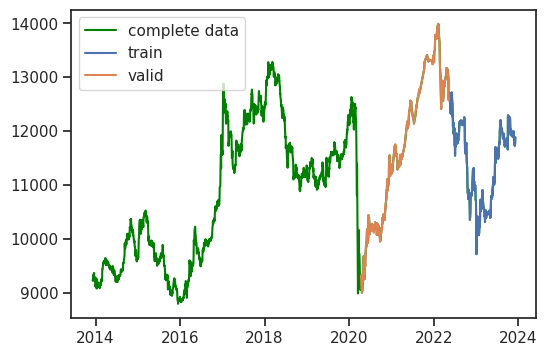

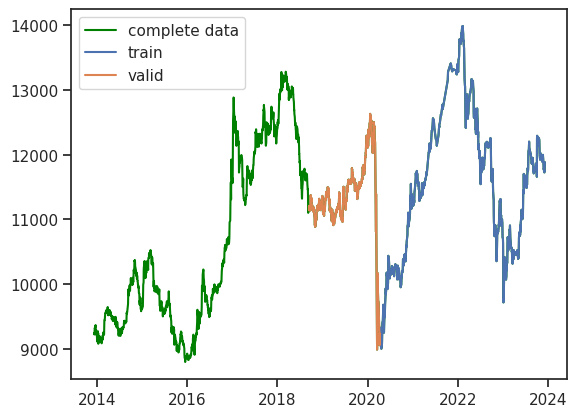

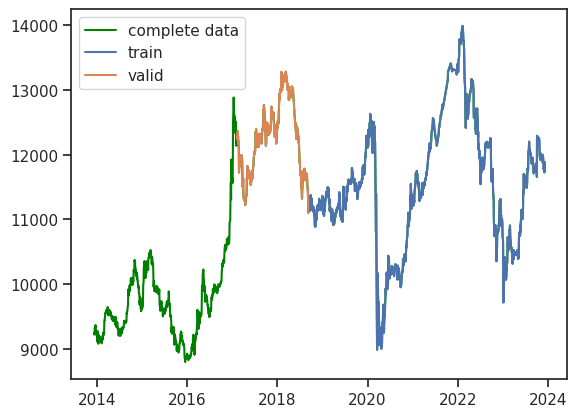

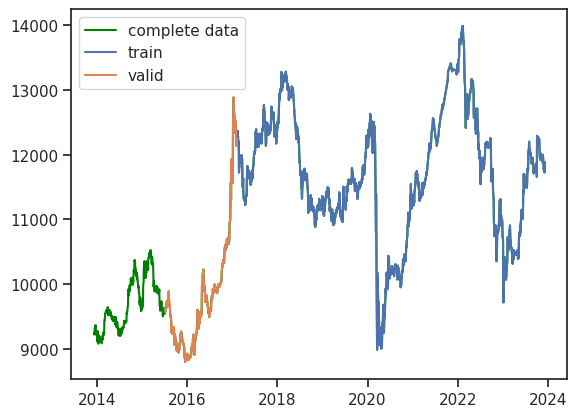

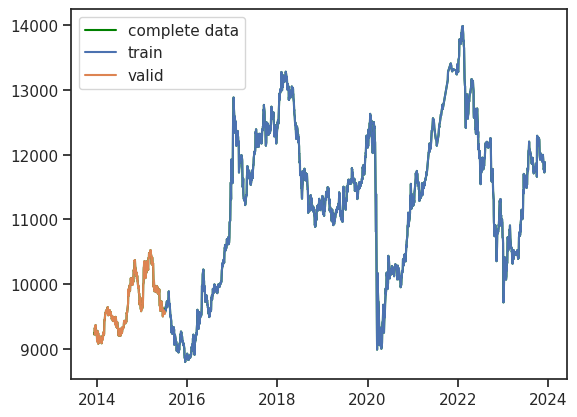

In [ ]:
plt.figure(figsize=(6,4))
for train_index, test_index in time_series_cv.split(data):
    plt.plot(df.index, df['COURS_CLOTURE'], label='complete data', color='green')
    plt.plot(data[train_index[0]:train_index[-1]].index,df['COURS_CLOTURE'][train_index[0]:train_index[-1]],label='train')
    plt.plot(data[test_index[0]:test_index[-1]].index,df['COURS_CLOTURE'][test_index[0]:test_index[-1]],label='valid')

    plt.legend(loc='best')
    plt.show()

The best Machine Learnign Model found in our case is Linear Regression with error score bellow:

*   **MSE Linear Regression: 447.3281178826784**
*   **MAE Linear Regression: 16.899694891563406**
*   **SMAPE Linear Regression: 0.1747179851699514**

And with the best parameters found after tuning the hyperparameters using GridSearch:

**Best Hyperparameters for Linear Regression:**
*   copy_X': True
*   fit_intercept': True
*   n_jobs': None
*   positive': False